In [88]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import re
import numpy as np
#import pandas as pd
from bisect import *
from decimal import Decimal
#from scipy.optimize import curve_fit
#import scipy.special as sps

In [90]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}

matplotlib.rc('font', **font)

In [91]:
def parseCounts(fname) :
  nop=0
  d ={}
  with open(fname) as f:
    print('\n\n---++ '+fname)
    for line in f:
      try:
        (left, hist) = line.split(':')
        (fun, tot) = left.split()
        d[fun] = {}
        d[fun]["tot"] = 0;
        d[fun]["hist"] = np.zeros(256)
      except:
        print('error')
        nop+=1
  with open(fname) as f:
    for line in f:
      try:
        (left, hist) = line.split(':')
        (fun, tot) = left.split()
        d[fun]["tot"] += float(tot)
        d[fun]["hist"] += np.fromstring(hist,sep=' ') 
      except:
        print('error')
        nop+=1
  return d

In [92]:
#dir = '/Users/innocent/cernbox/HLTperf/'
#files = [dir+"HLTMathProfile"]
dir = '/Users/innocent/cernbox/MathProfiles/'
names = ["HS06MathProfiles",'fp2006profiles',"igwn","cmsWF"]
name = names[3]
file = dir+name
score = parseCounts(file)



---++ /Users/innocent/cernbox/MathProfiles/cmsWF


In [93]:
labels = []
for fun in score : 
    if re.search("_lin",fun) : labels.append(fun)
print(labels)

['acos_lin', 'acosf_lin', 'acosh_lin', 'acoshf_lin', 'asin_lin', 'asinf_lin', 'asinh_lin', 'asinhf_lin', 'atan2+_lin', 'atan2+f_lin', 'atan2/_lin', 'atan2/f_lin', 'atan_lin', 'atanf_lin', 'atanh_lin', 'atanhf_lin', 'cbrt_lin', 'cbrtf_lin', 'cos_lin', 'cosf_lin', 'cosh_lin', 'coshf_lin', 'cospi_lin', 'cospif_lin', 'erf_lin', 'erfc_lin', 'erfcf_lin', 'erff_lin', 'exp10_lin', 'exp10f_lin', 'exp2_lin', 'exp2f_lin', 'exp_lin', 'expf_lin', 'expm1_lin', 'expm1f_lin', 'hypot+_lin', 'hypot+f_lin', 'hypot/_lin', 'hypot/f_lin', 'j0_lin', 'j0f_lin', 'j1_lin', 'j1f_lin', 'lgamma_lin', 'lgammaf_lin', 'log10_lin', 'log10f_lin', 'log1p_lin', 'log1pf_lin', 'log2_lin', 'log2f_lin', 'log_lin', 'logf_lin', 'powx_lin', 'powxf_lin', 'powy_lin', 'powyf_lin', 'rsqrt_lin', 'rsqrtf_lin', 'sin_lin', 'sincos_lin', 'sincosf_lin', 'sinf_lin', 'sinh_lin', 'sinhf_lin', 'sinpi_lin', 'sinpif_lin', 'tan_lin', 'tanf_lin', 'tanh_lin', 'tanhf_lin', 'tanpi_lin', 'tanpif_lin', 'tgamma_lin', 'tgammaf_lin', 'y0_lin', 'y0f_lin'

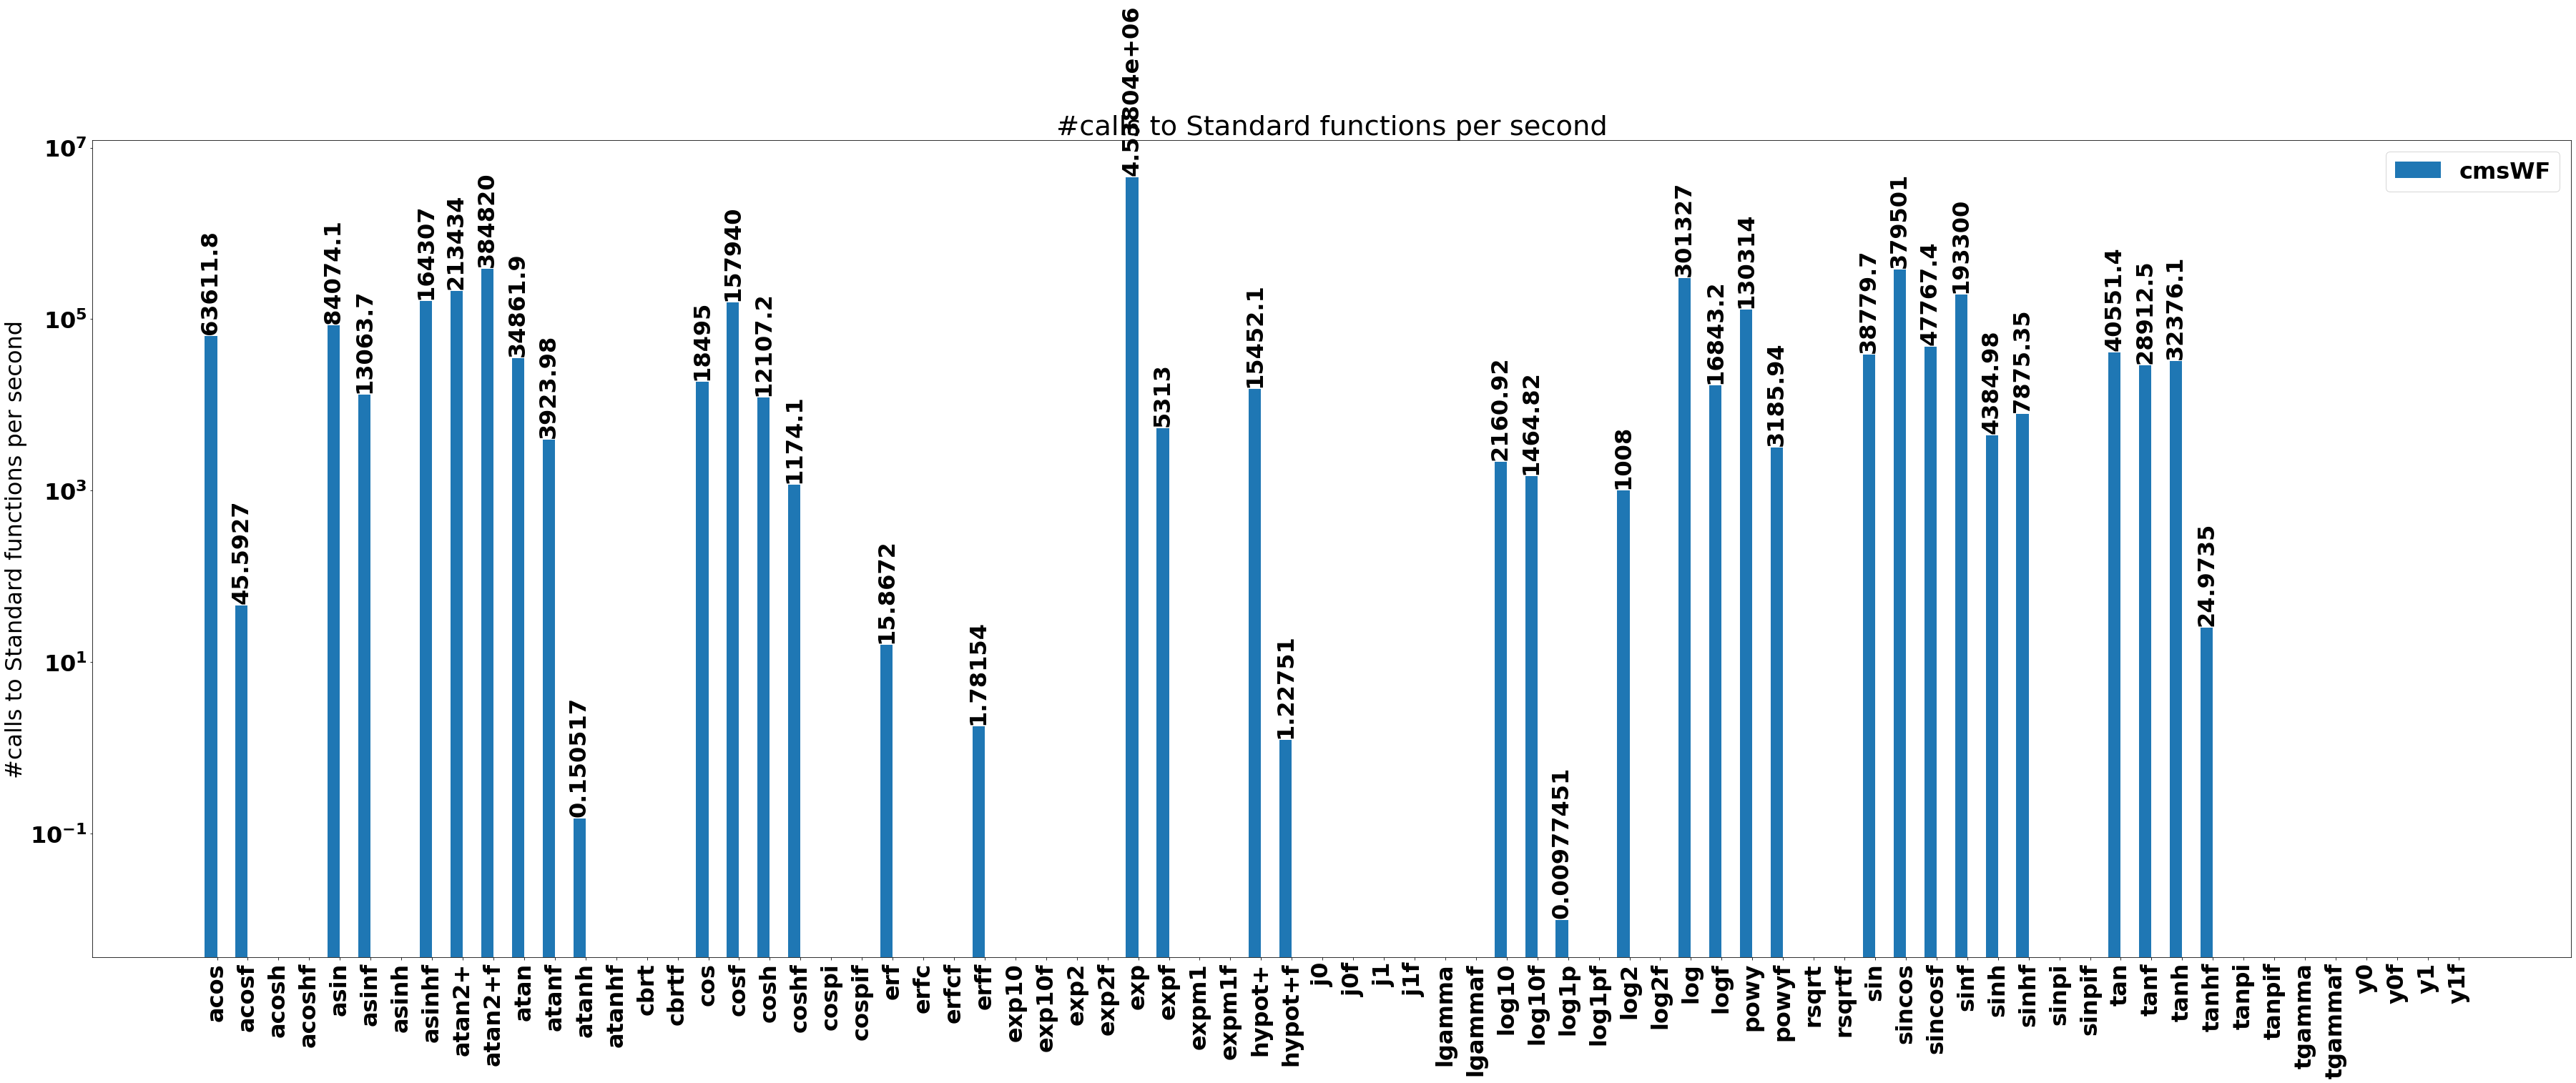

In [94]:
plt.rcParams["figure.figsize"] = (50,20)
val = []
lab = []
for fun in labels :
    if re.search("/",fun) : continue
    if re.search("powx",fun) : continue
    (l,d) = fun.split("_")
    lab.append(l)
    val.append(score[fun]['tot'])
  
x = np.arange(len(lab))  # the label locations
width = 0.4  # the width of a bar

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/2, val, width, label=name)

# Add some text for labels, title and custom x-axis tick labels, etc.
label = "#calls to Standard functions per second"
ax.set_ylabel(label)
ax.set_title(label)
ax.set_xticks(x,lab)
ax.legend()
ax.bar_label(rects2, padding=3, rotation=90)
fig.tight_layout()
plt.yscale("log")
plt.xticks(rotation=90)
plt.show()


In [95]:
def plotOne(fun,wf) :
    x = np.linspace(-32,32,256)
    e = np.linspace(-128,128,256)
    fig, ax = plt.subplots()
    rects2 = ax.bar(x, score[fun+"_lin"]["hist"], 64/256., label=wf)
    label = "#calls to Standard functions per second for "+fun
    ax.set_xlabel("x")
    ax.set_ylabel(label)
    ax.set_title(label)
    ax.legend()
    plt.grid()
    plt.show()
    fig, ax = plt.subplots()
    rects1 = ax.bar(e, score[fun+"_log"]["hist"], 1.0, label=wf)
    ax.set_xlabel("log2(x)")
    ax.set_ylabel(label)
    ax.set_title(label)
    ax.legend()
    plt.grid()
    plt.show()

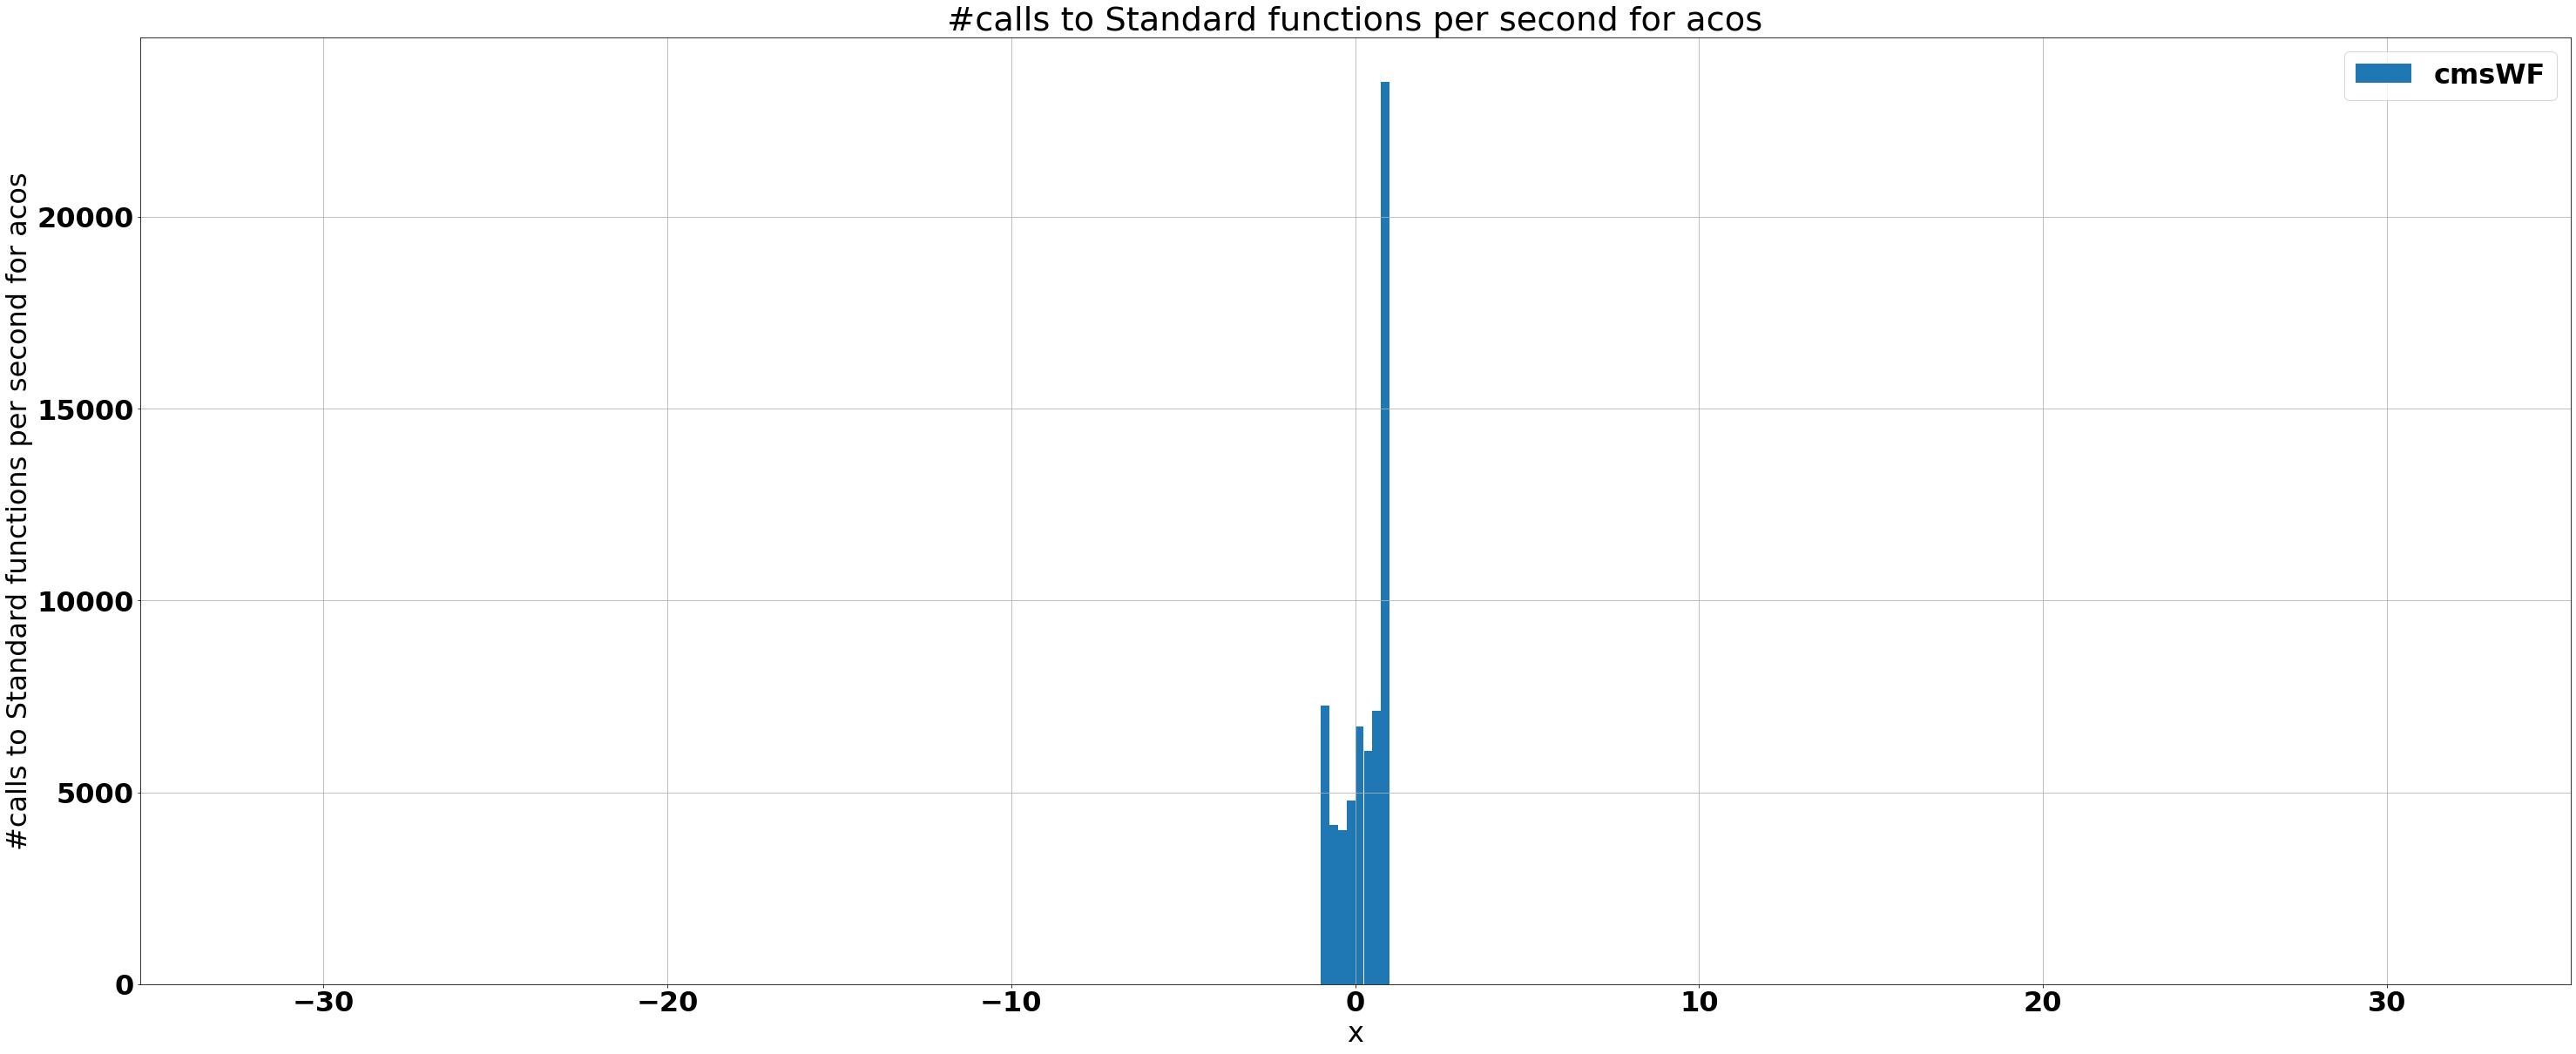

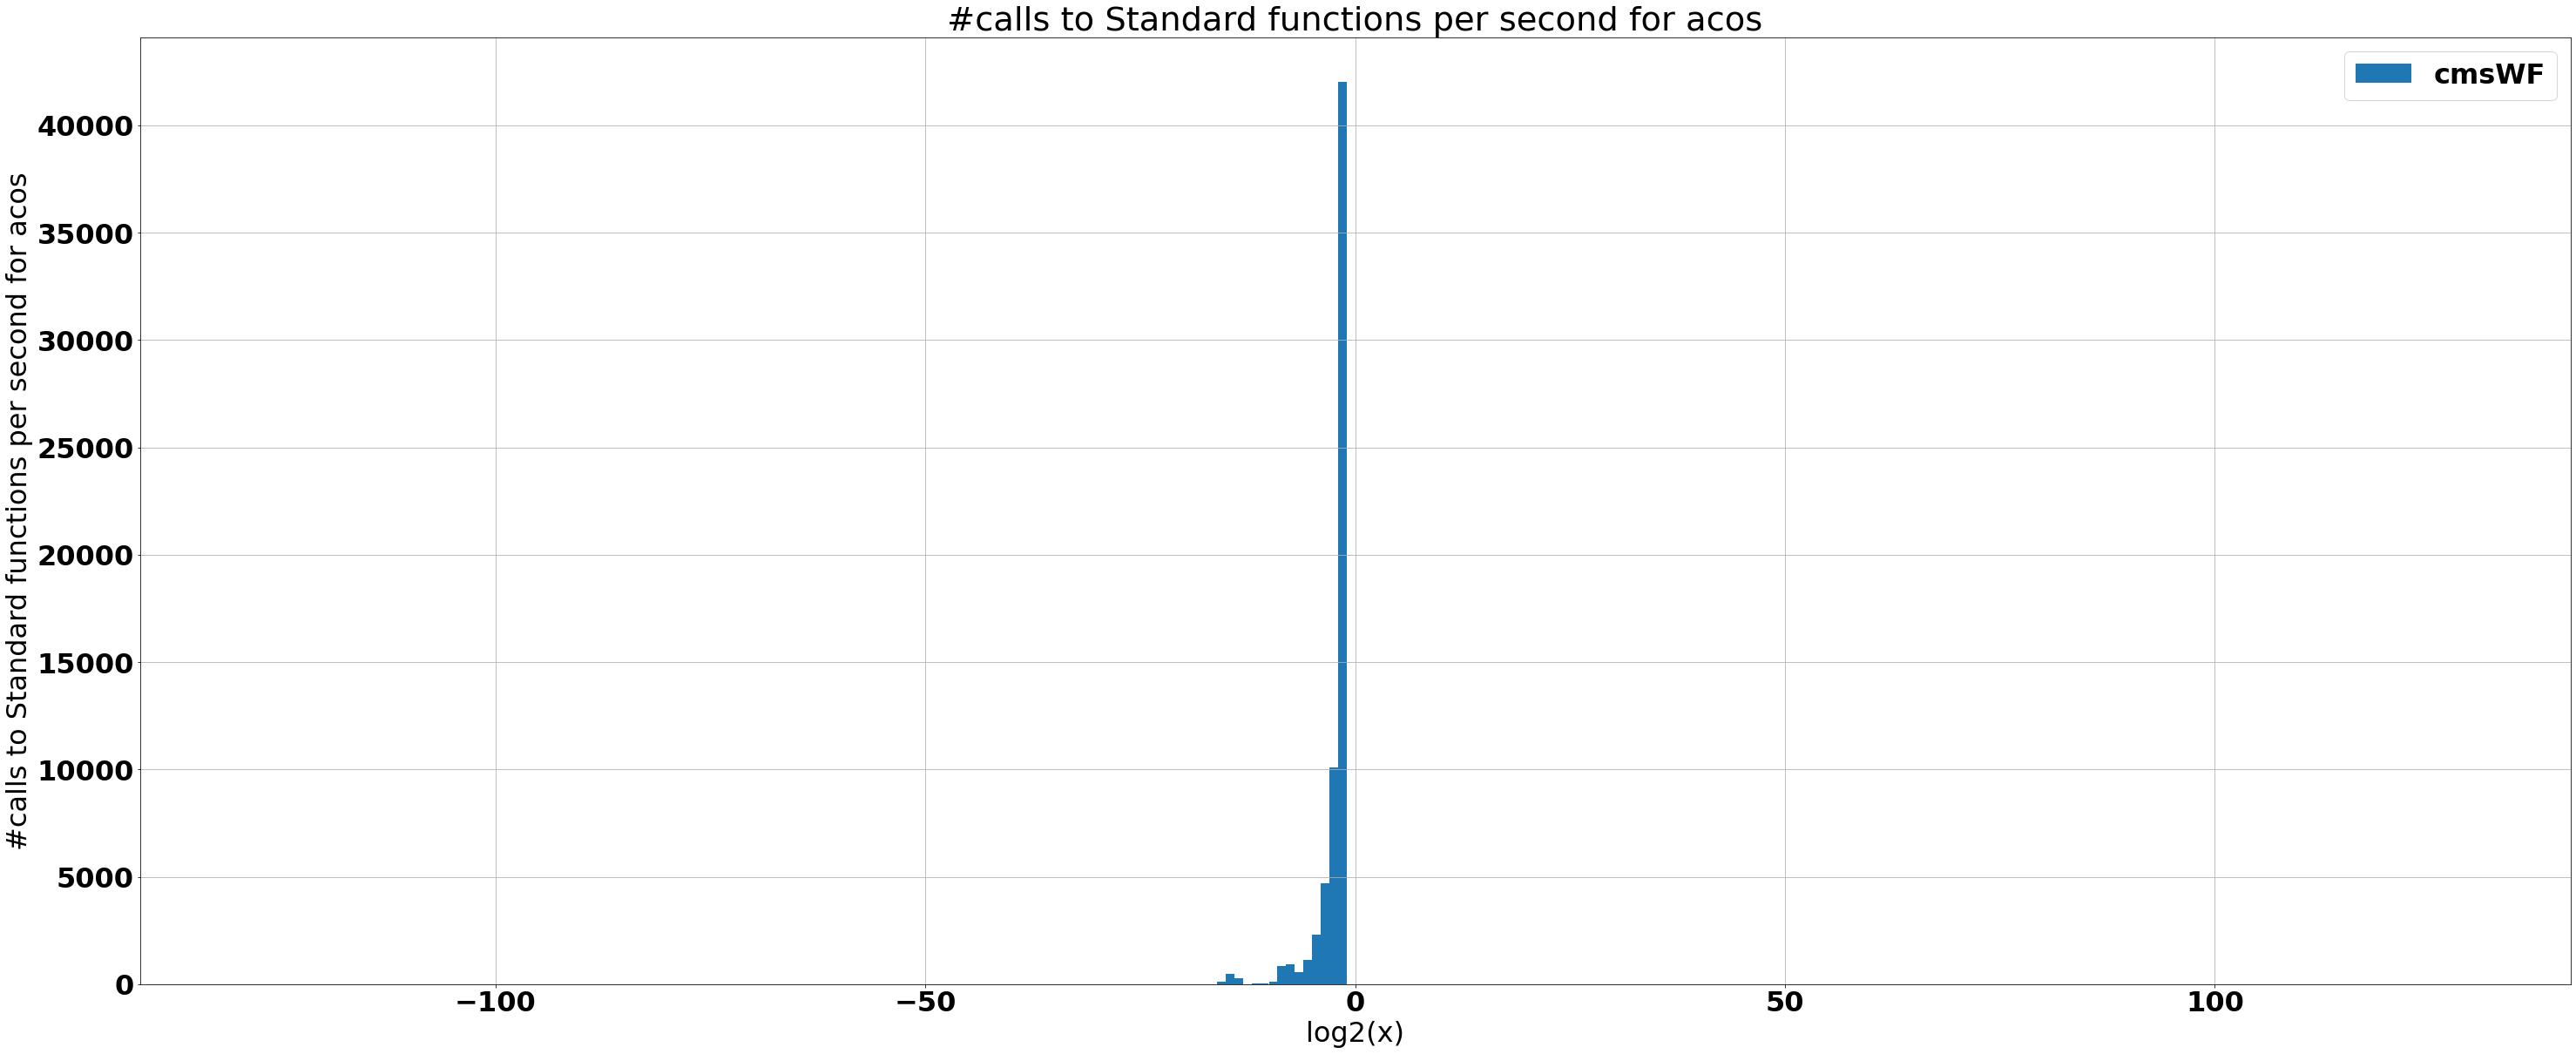

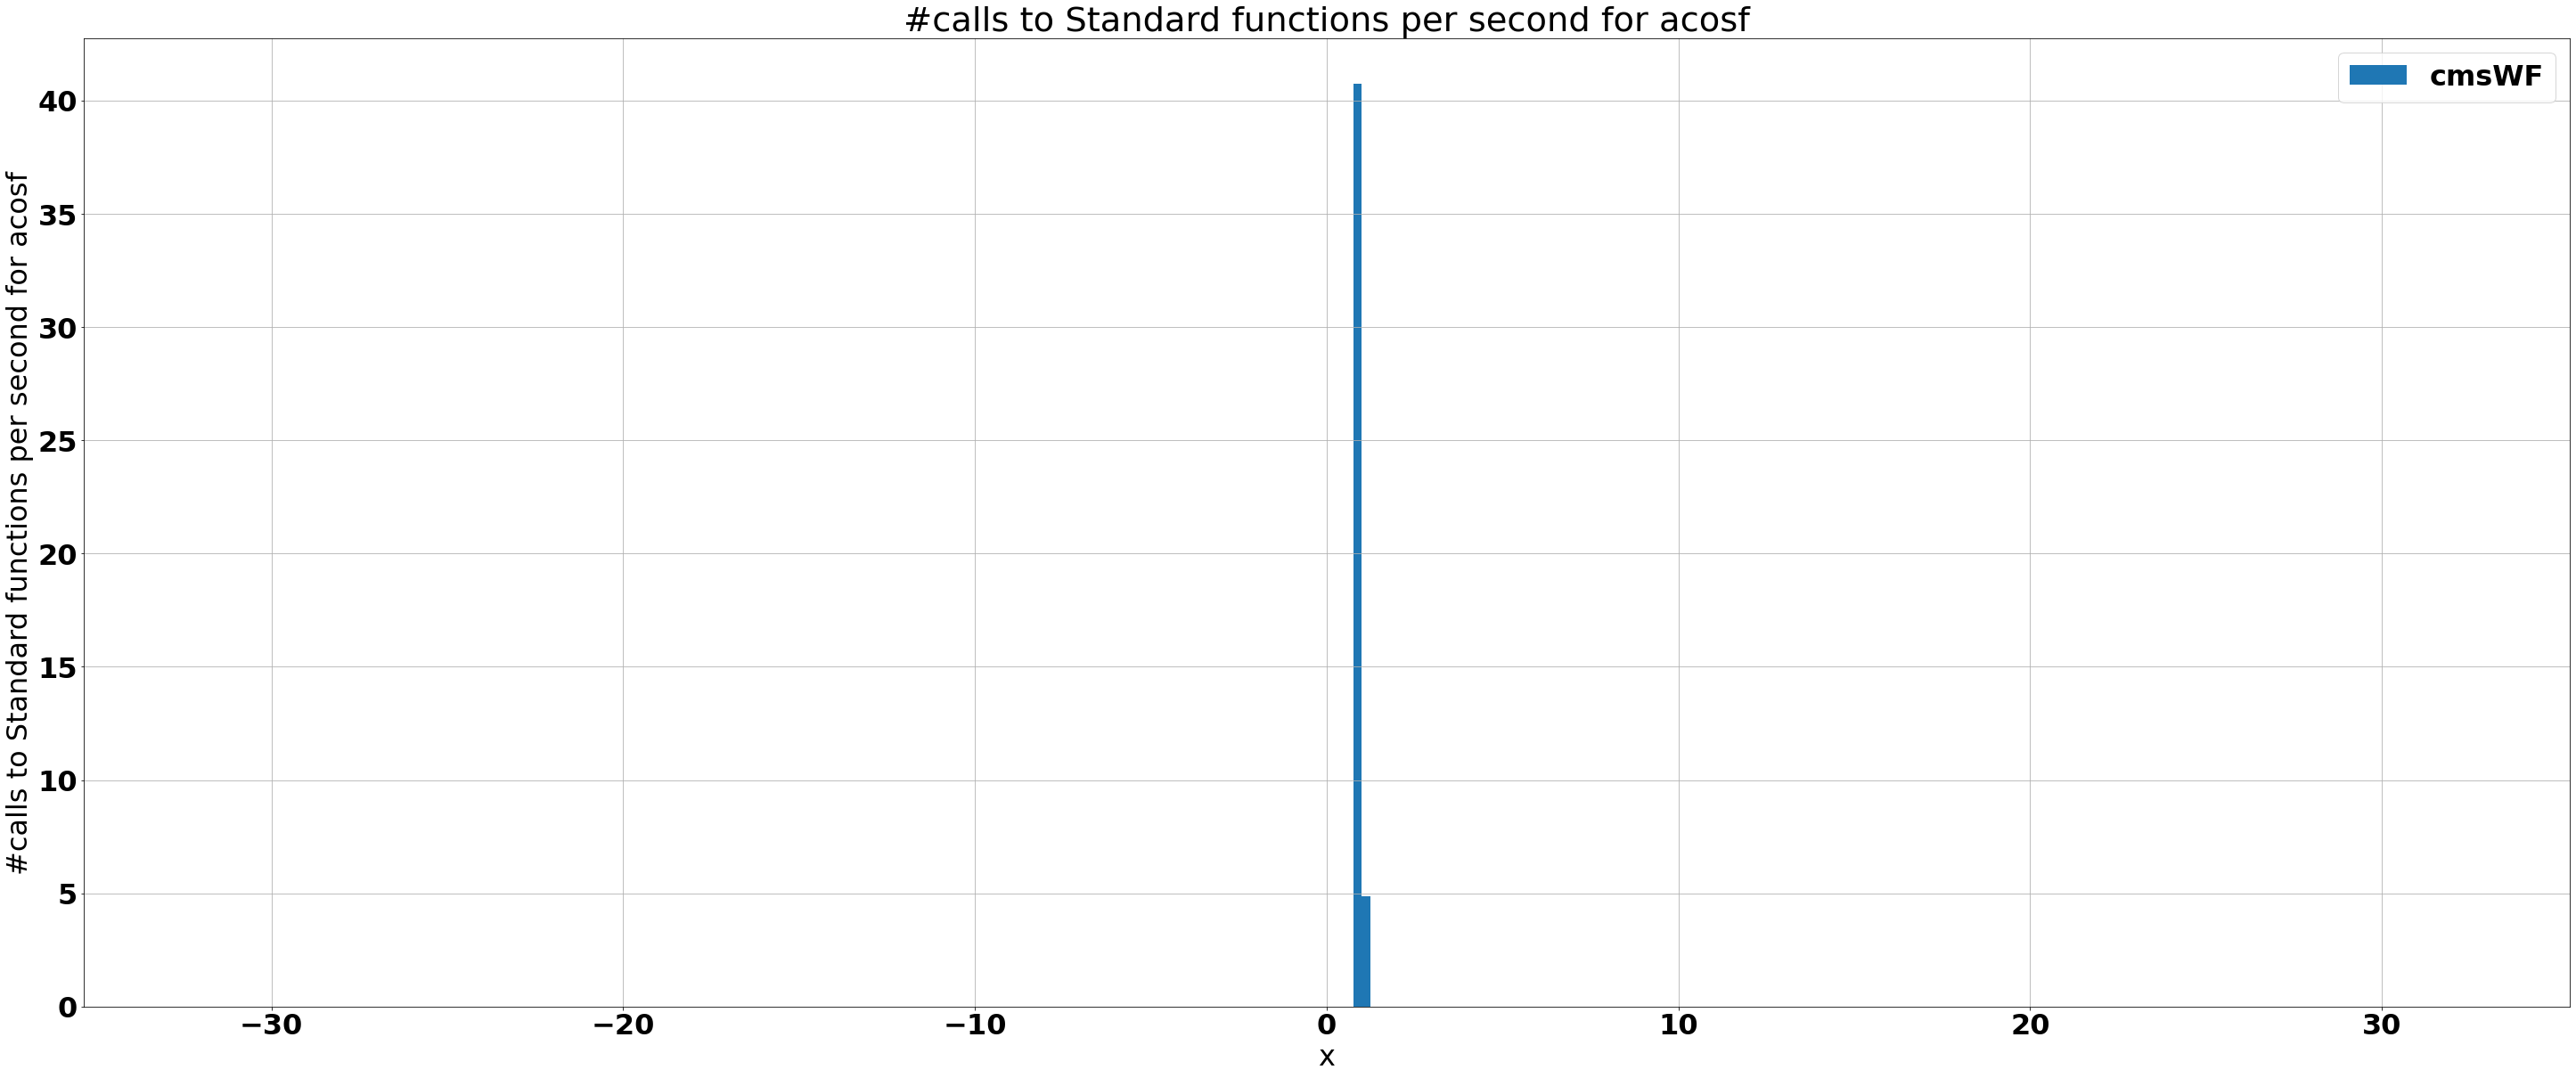

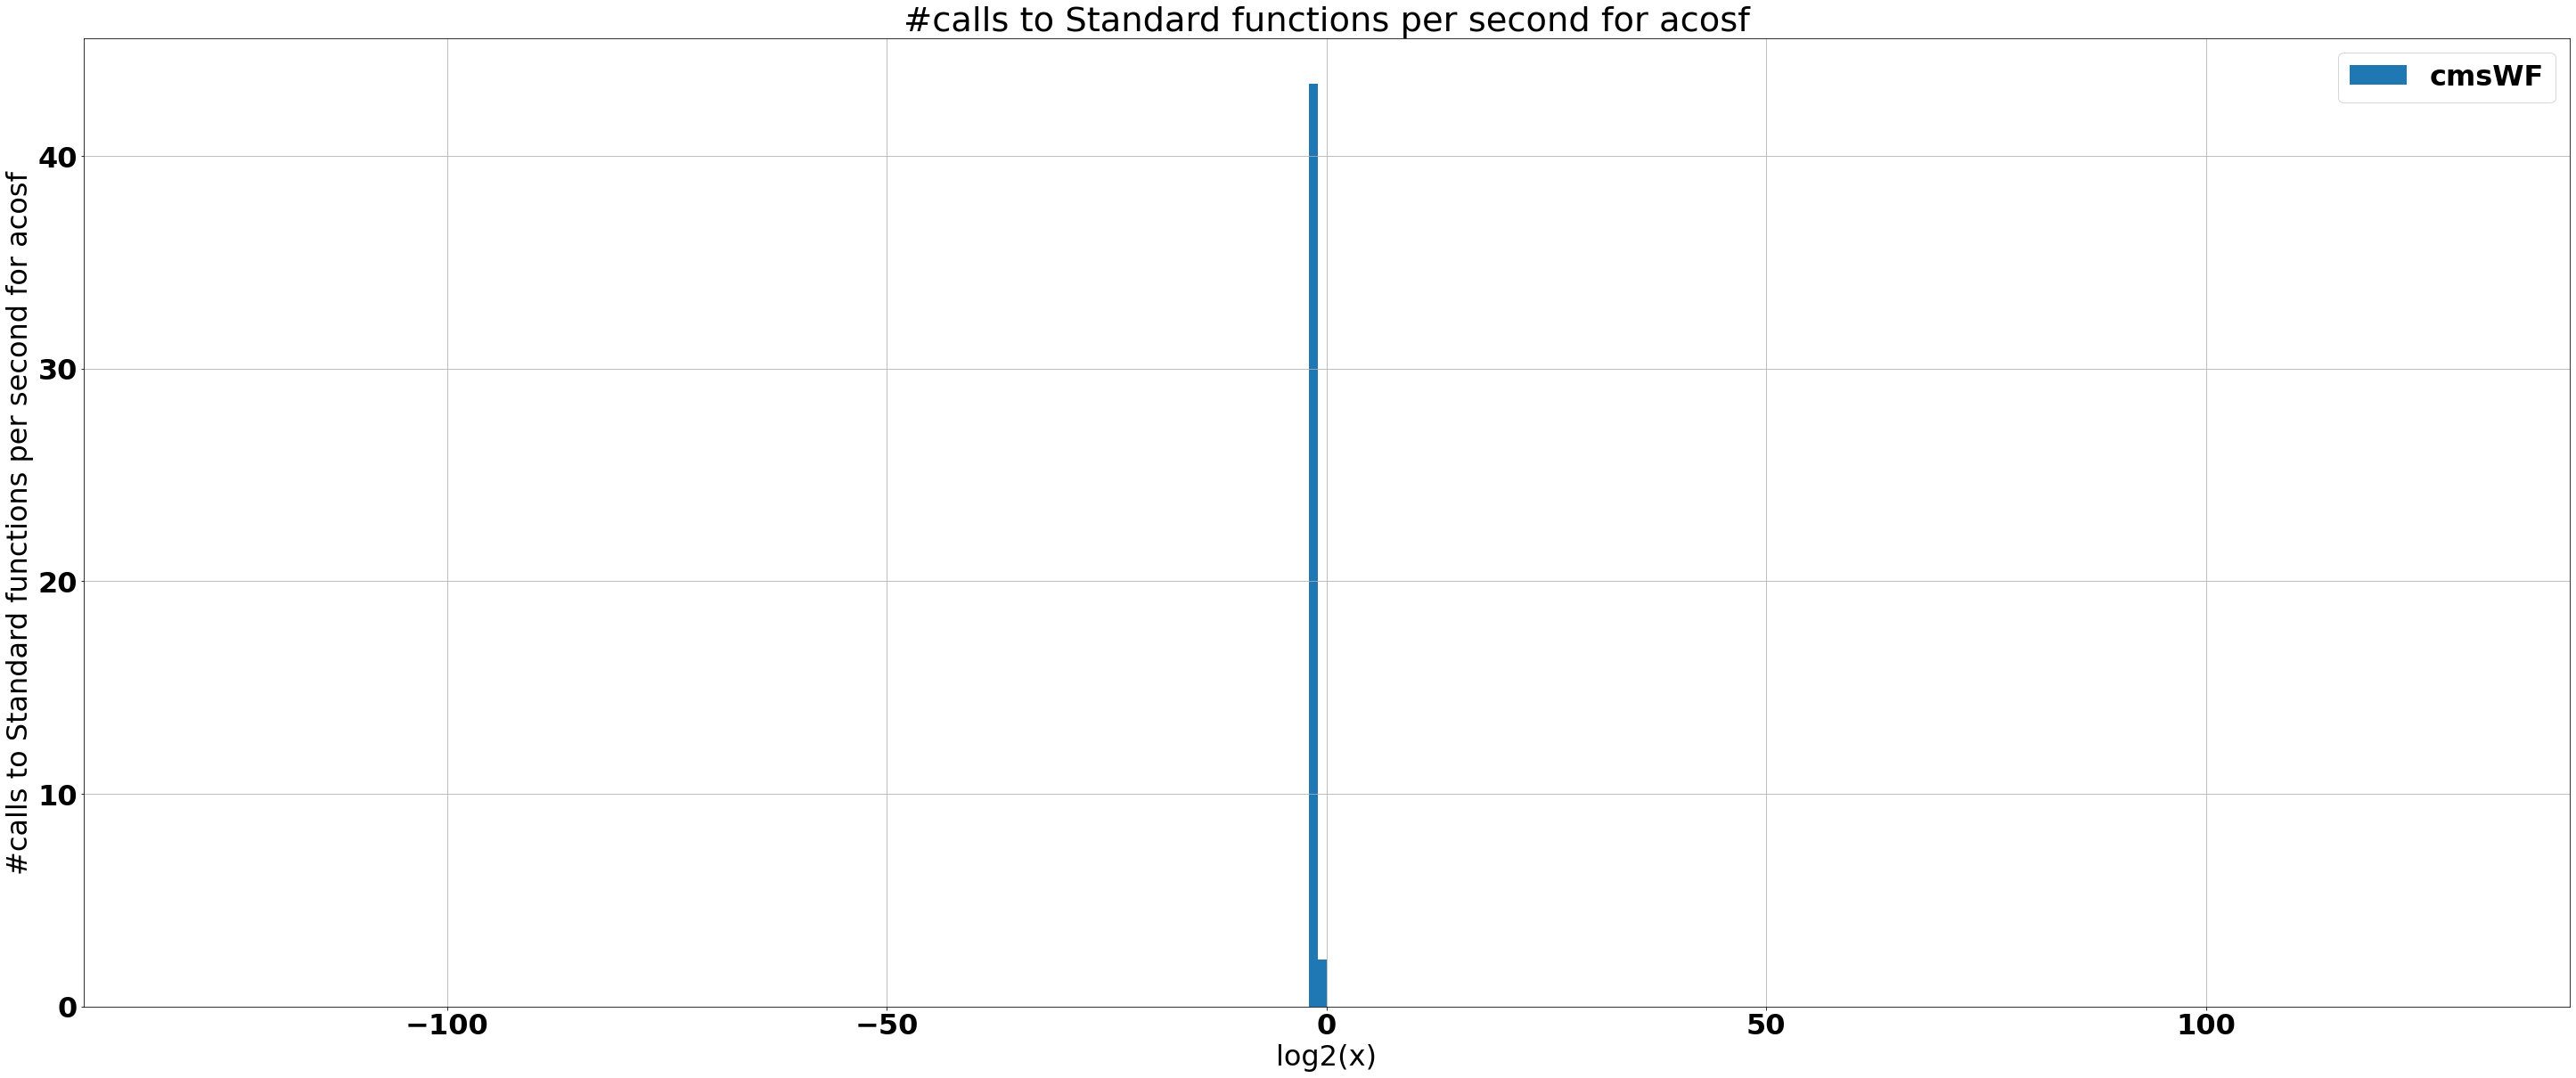

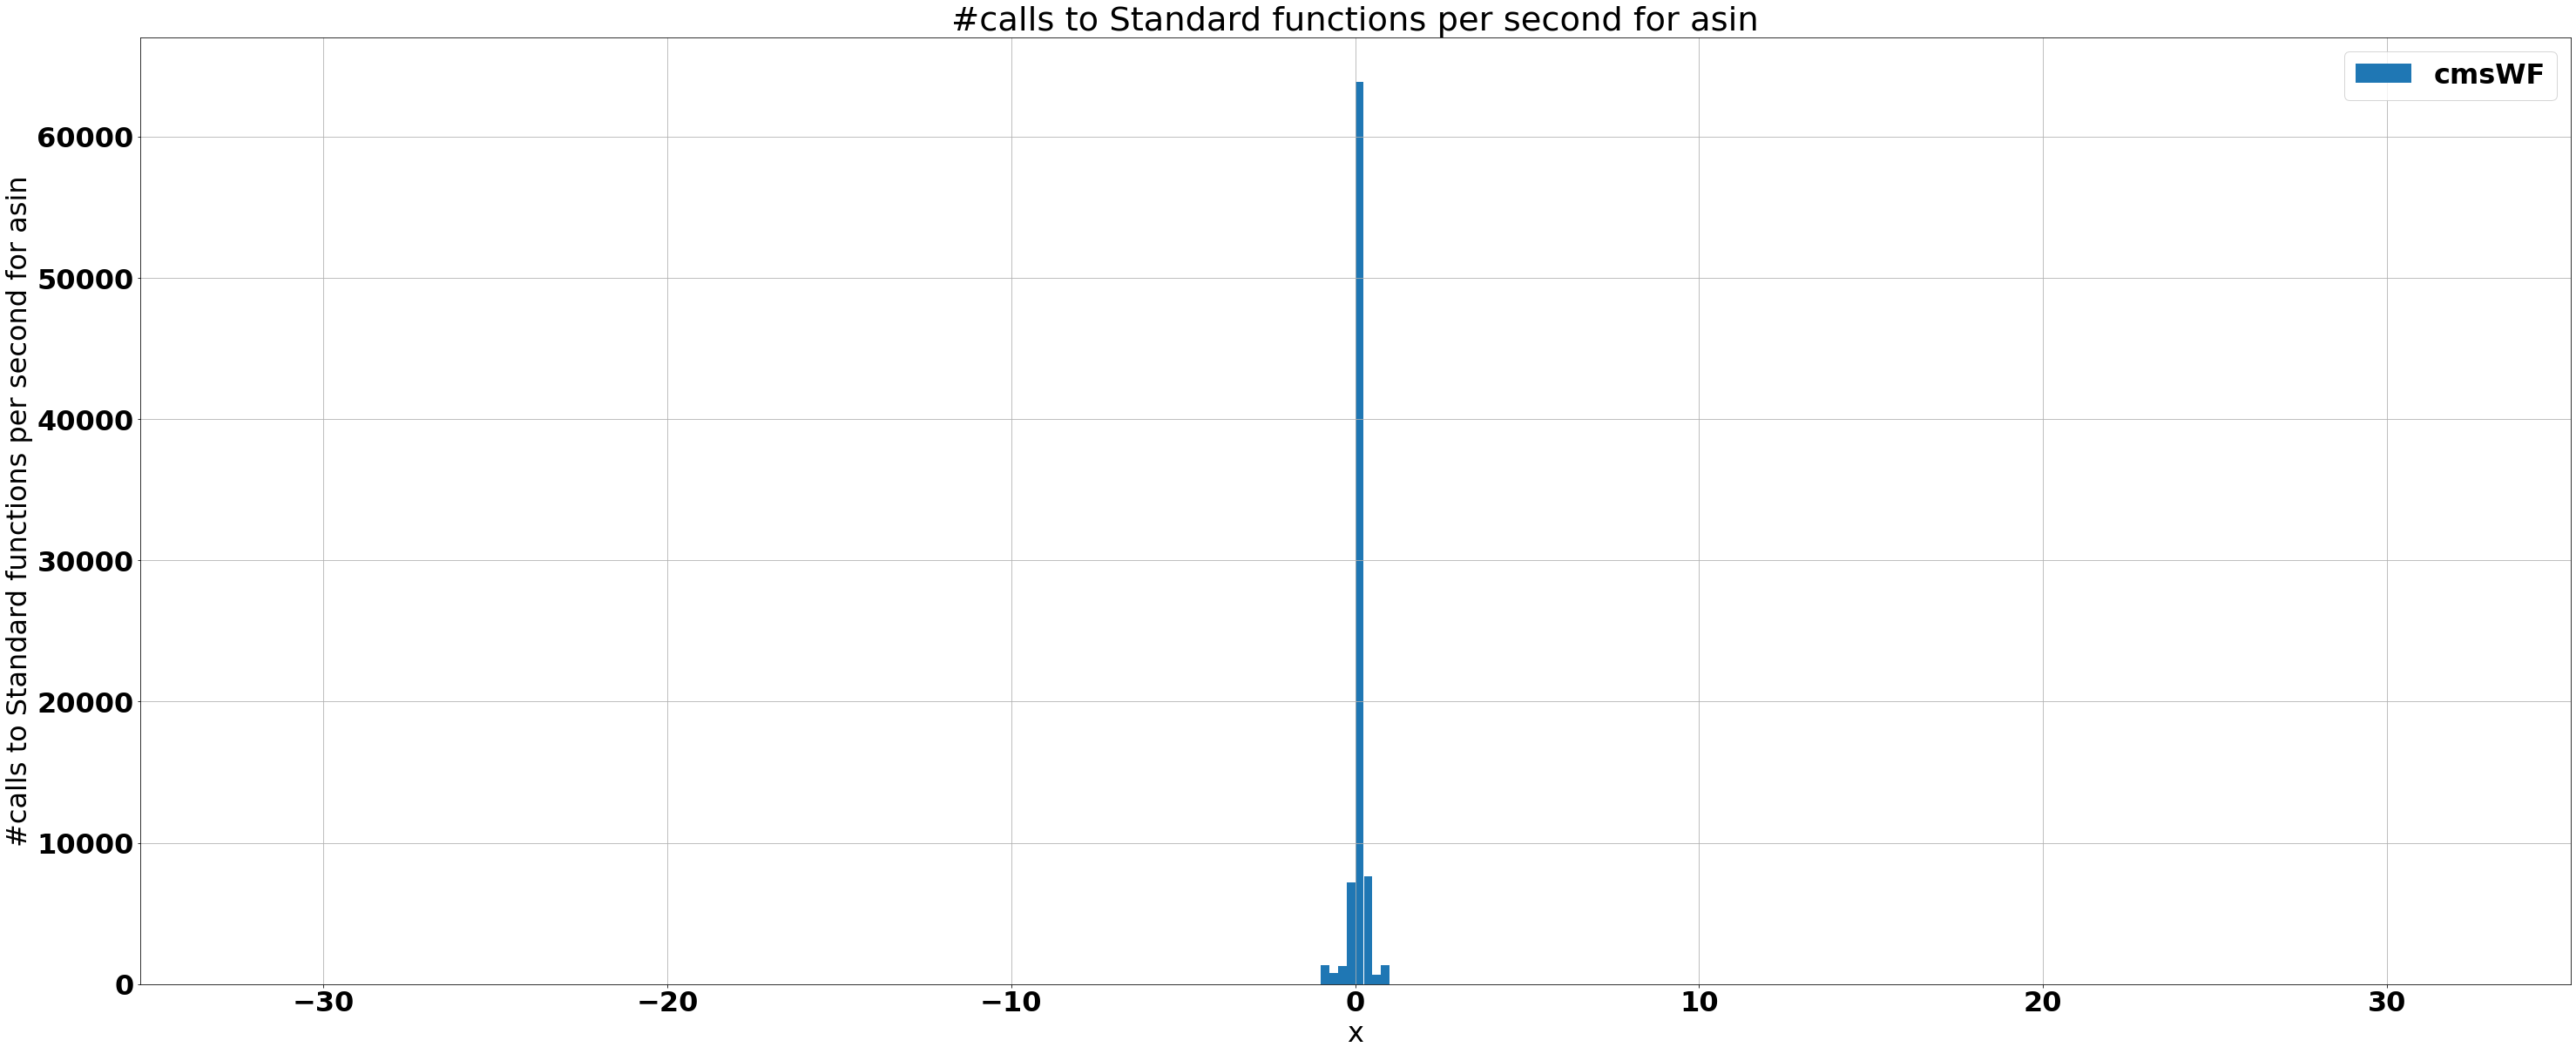

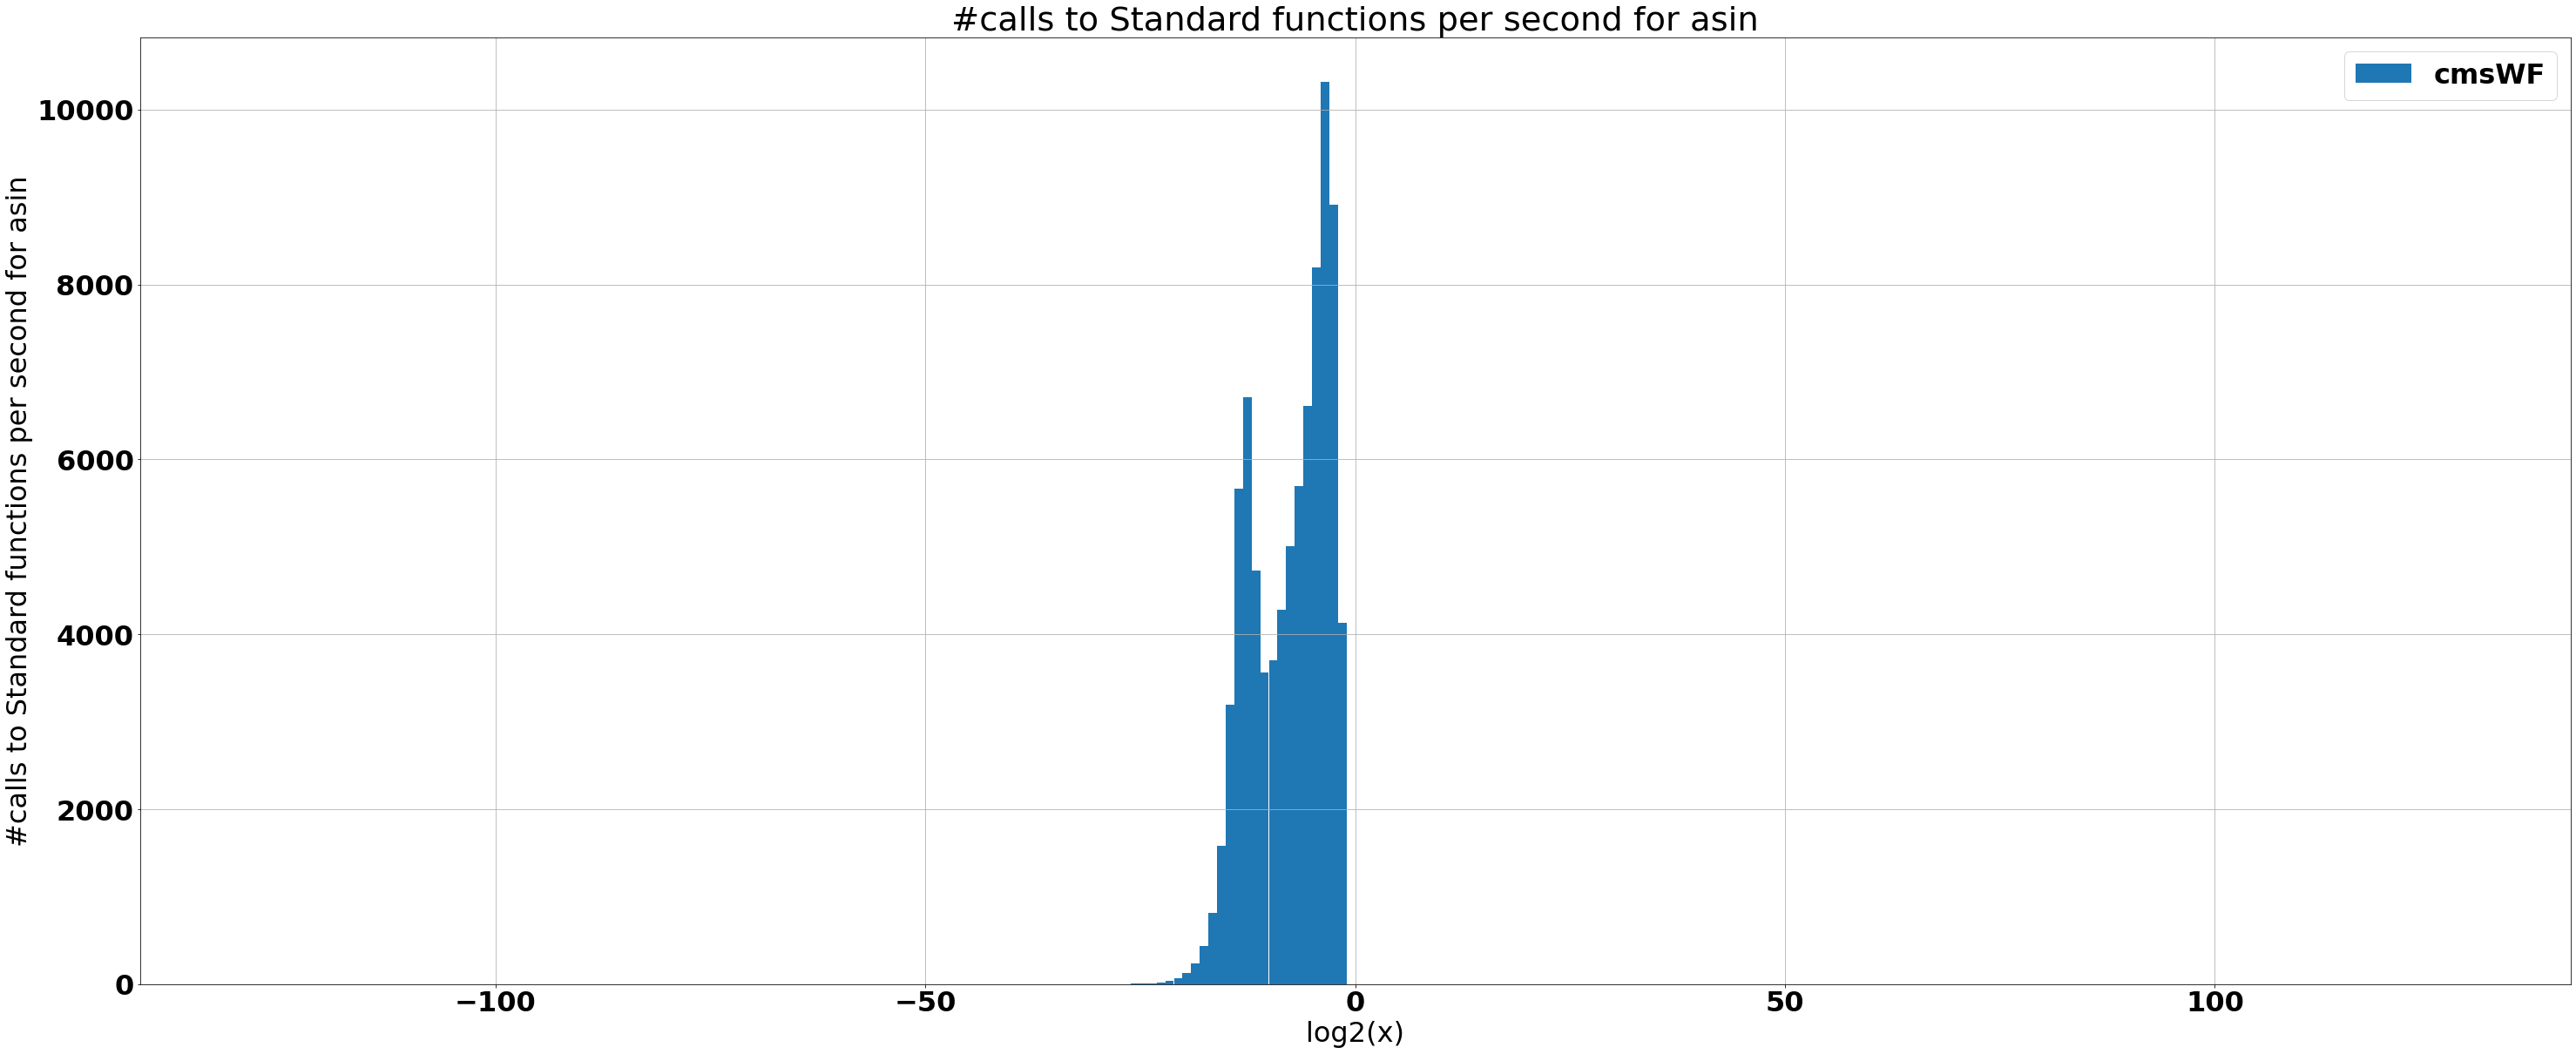

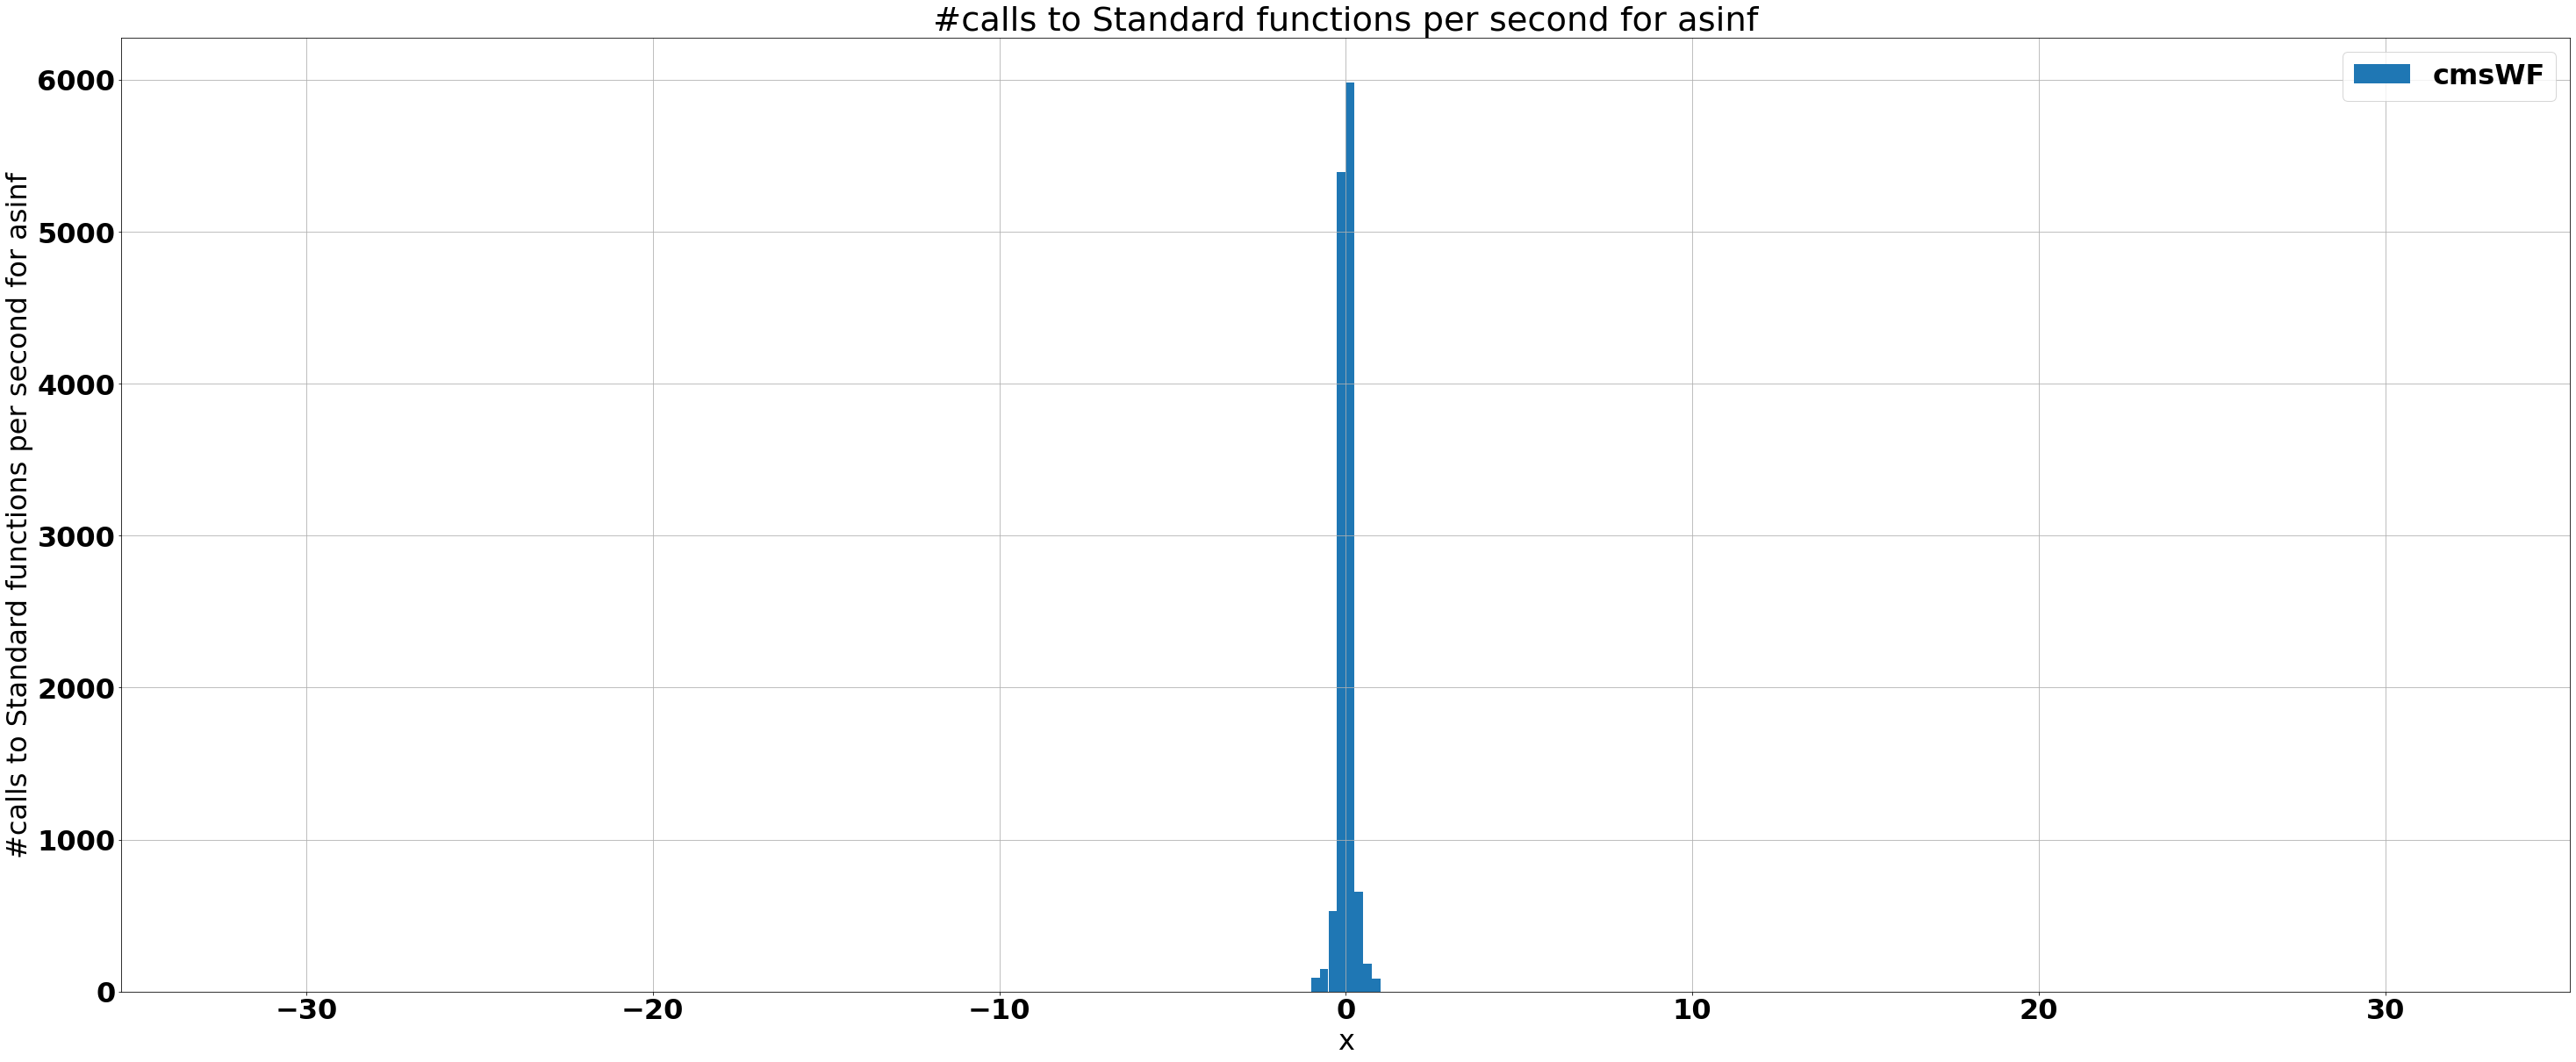

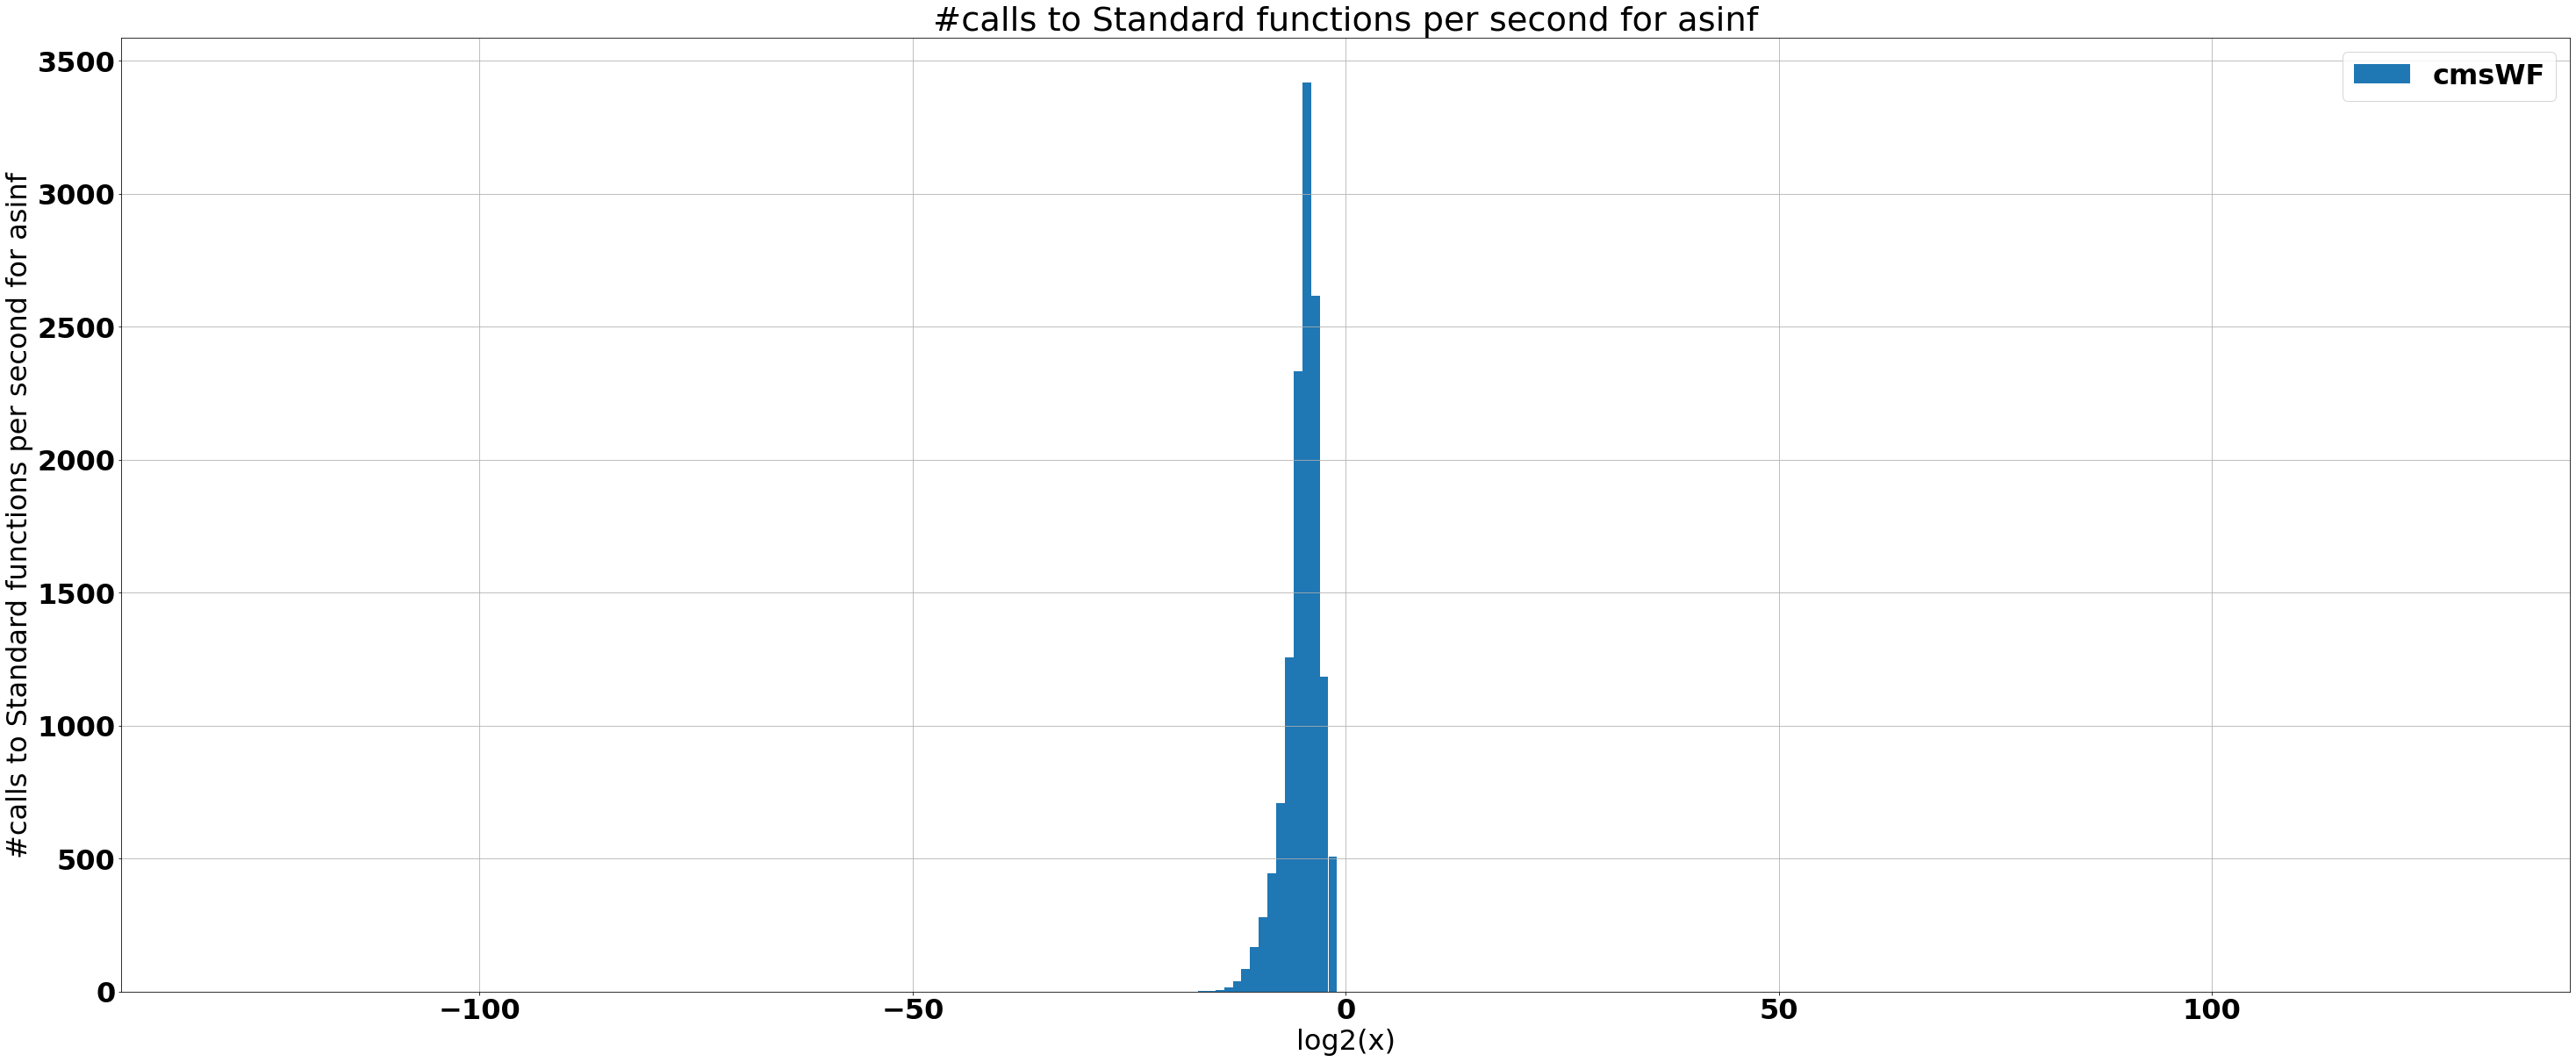

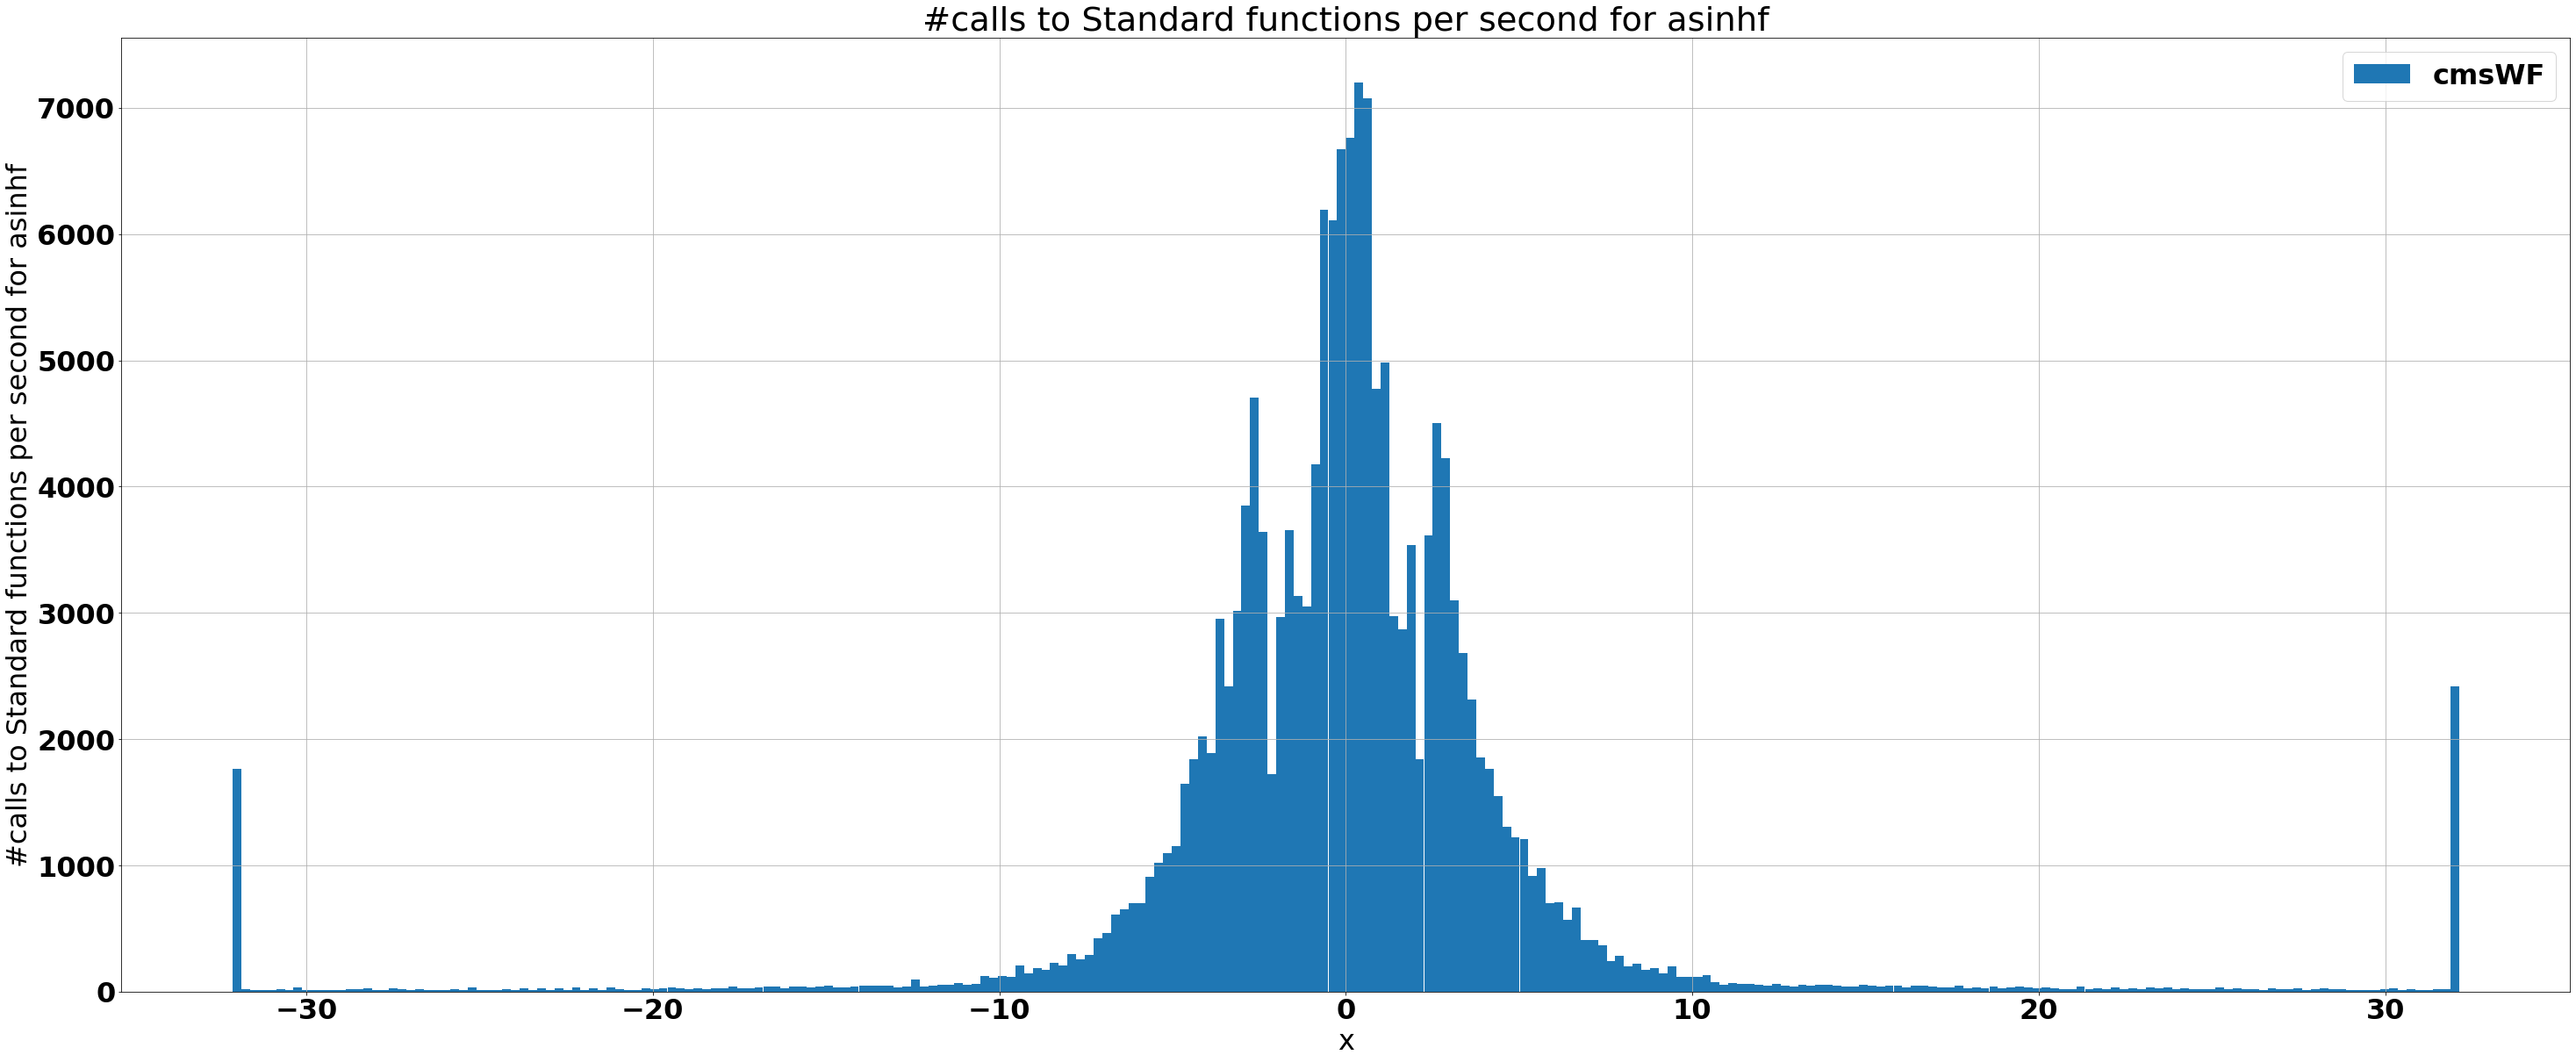

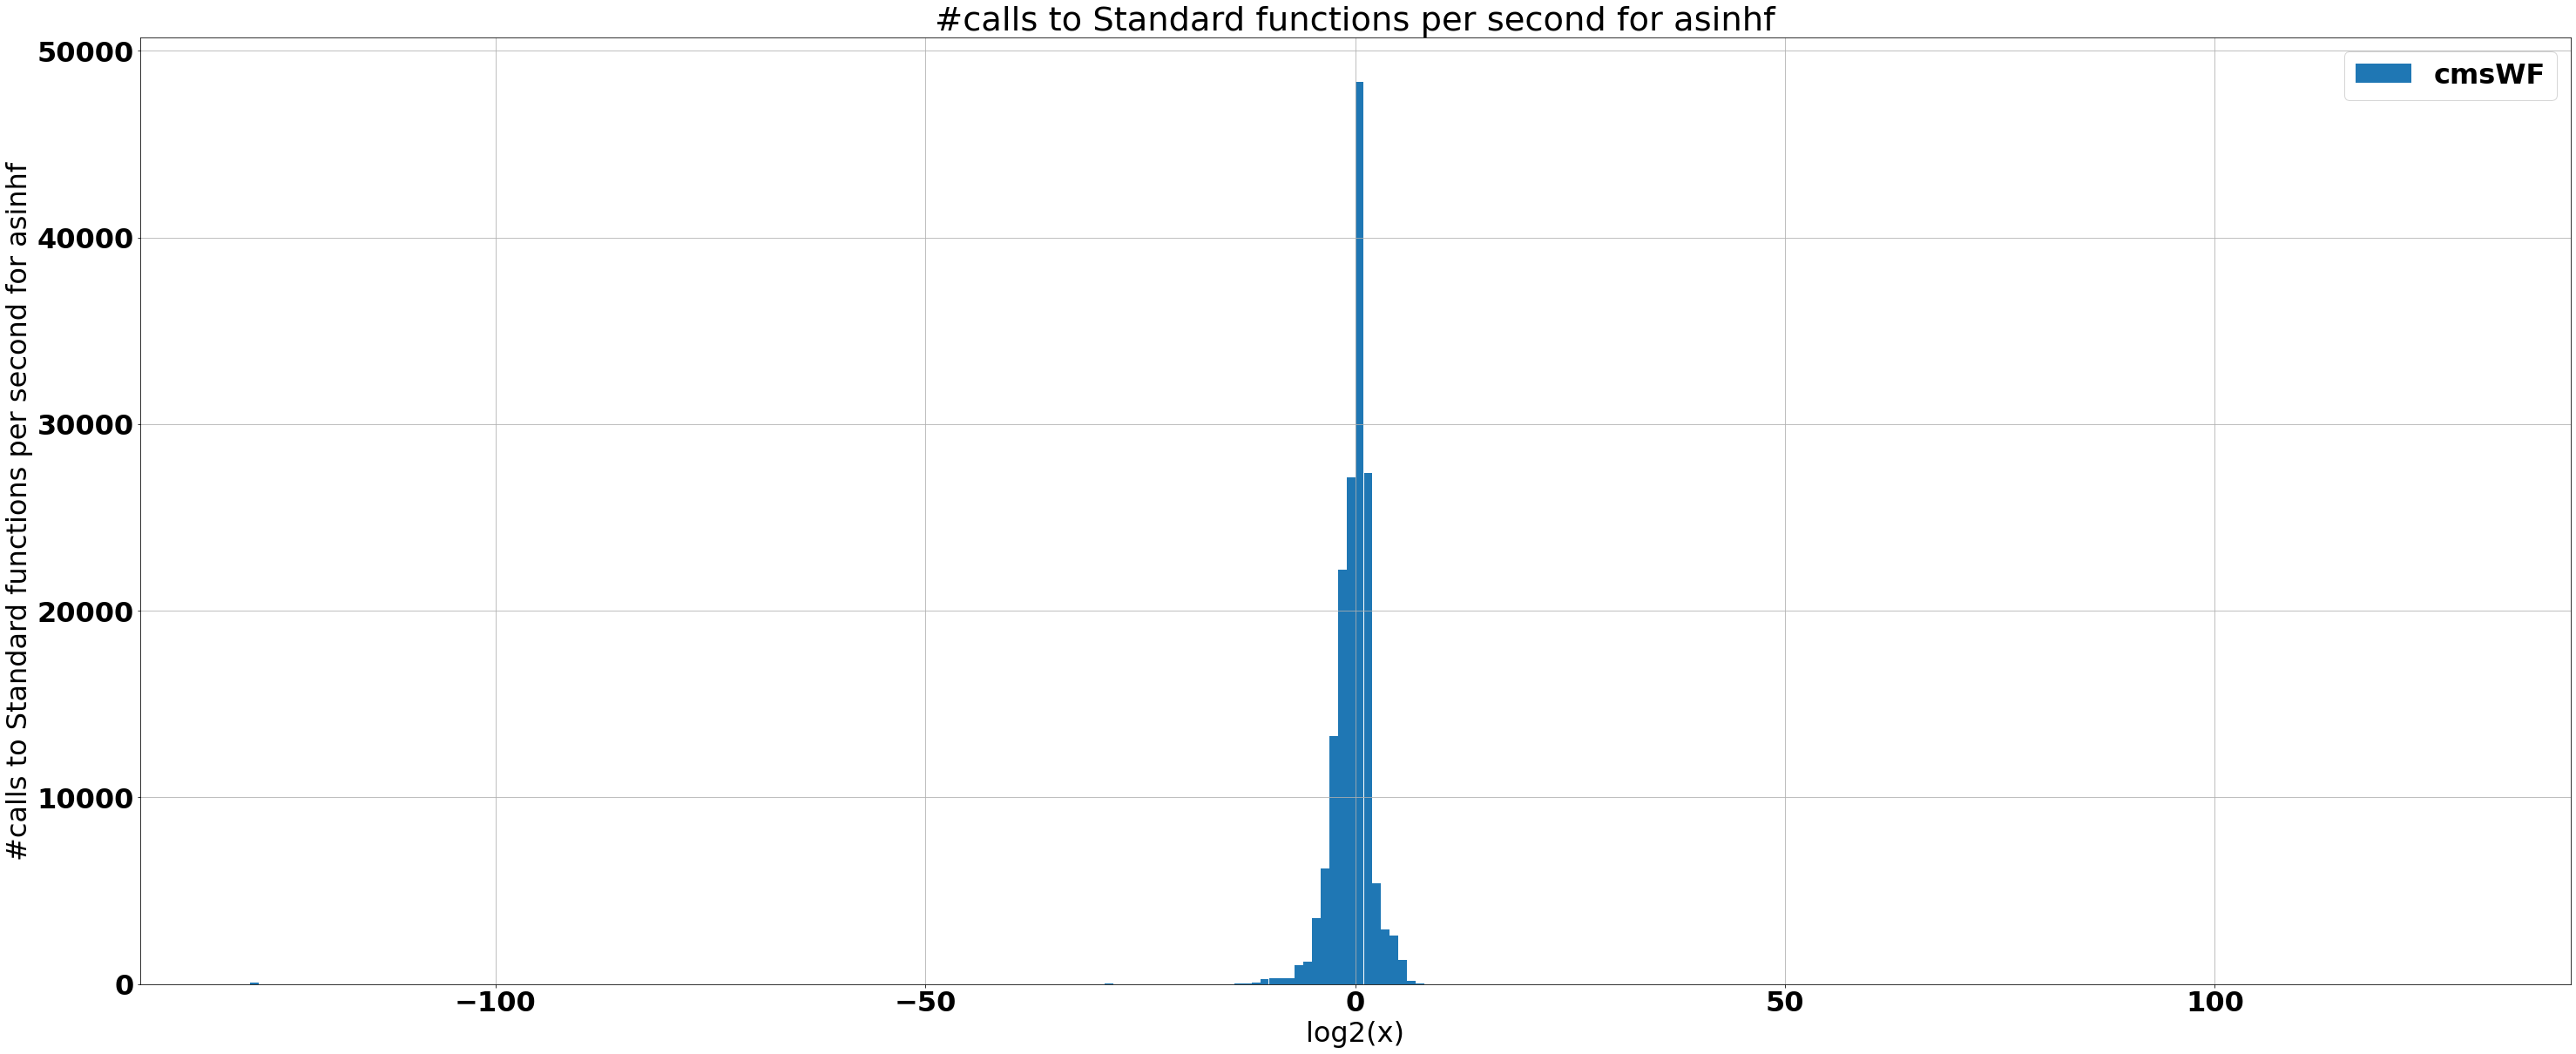

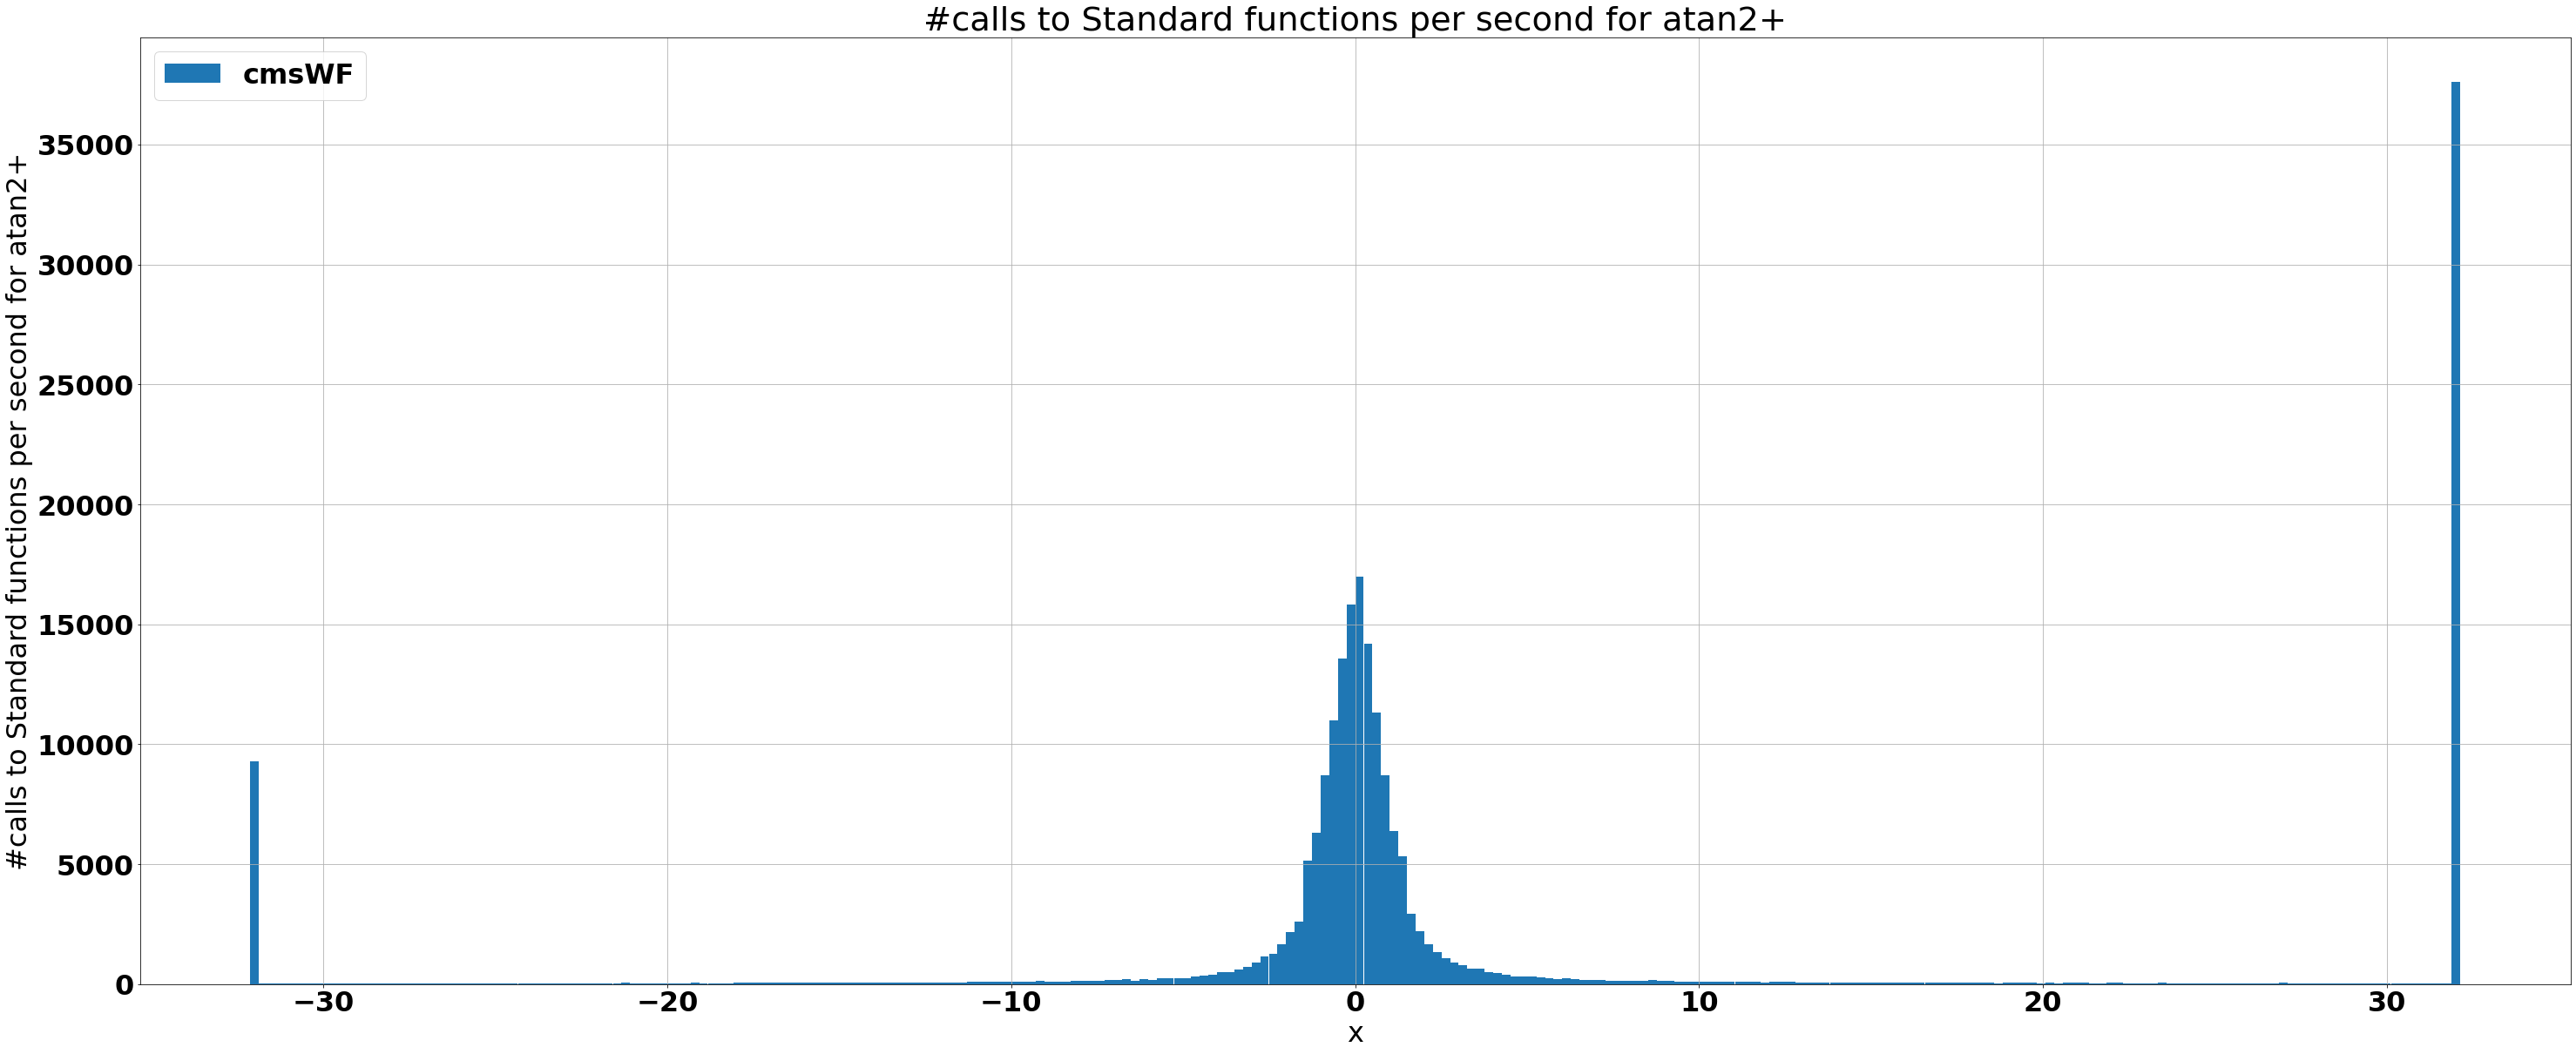

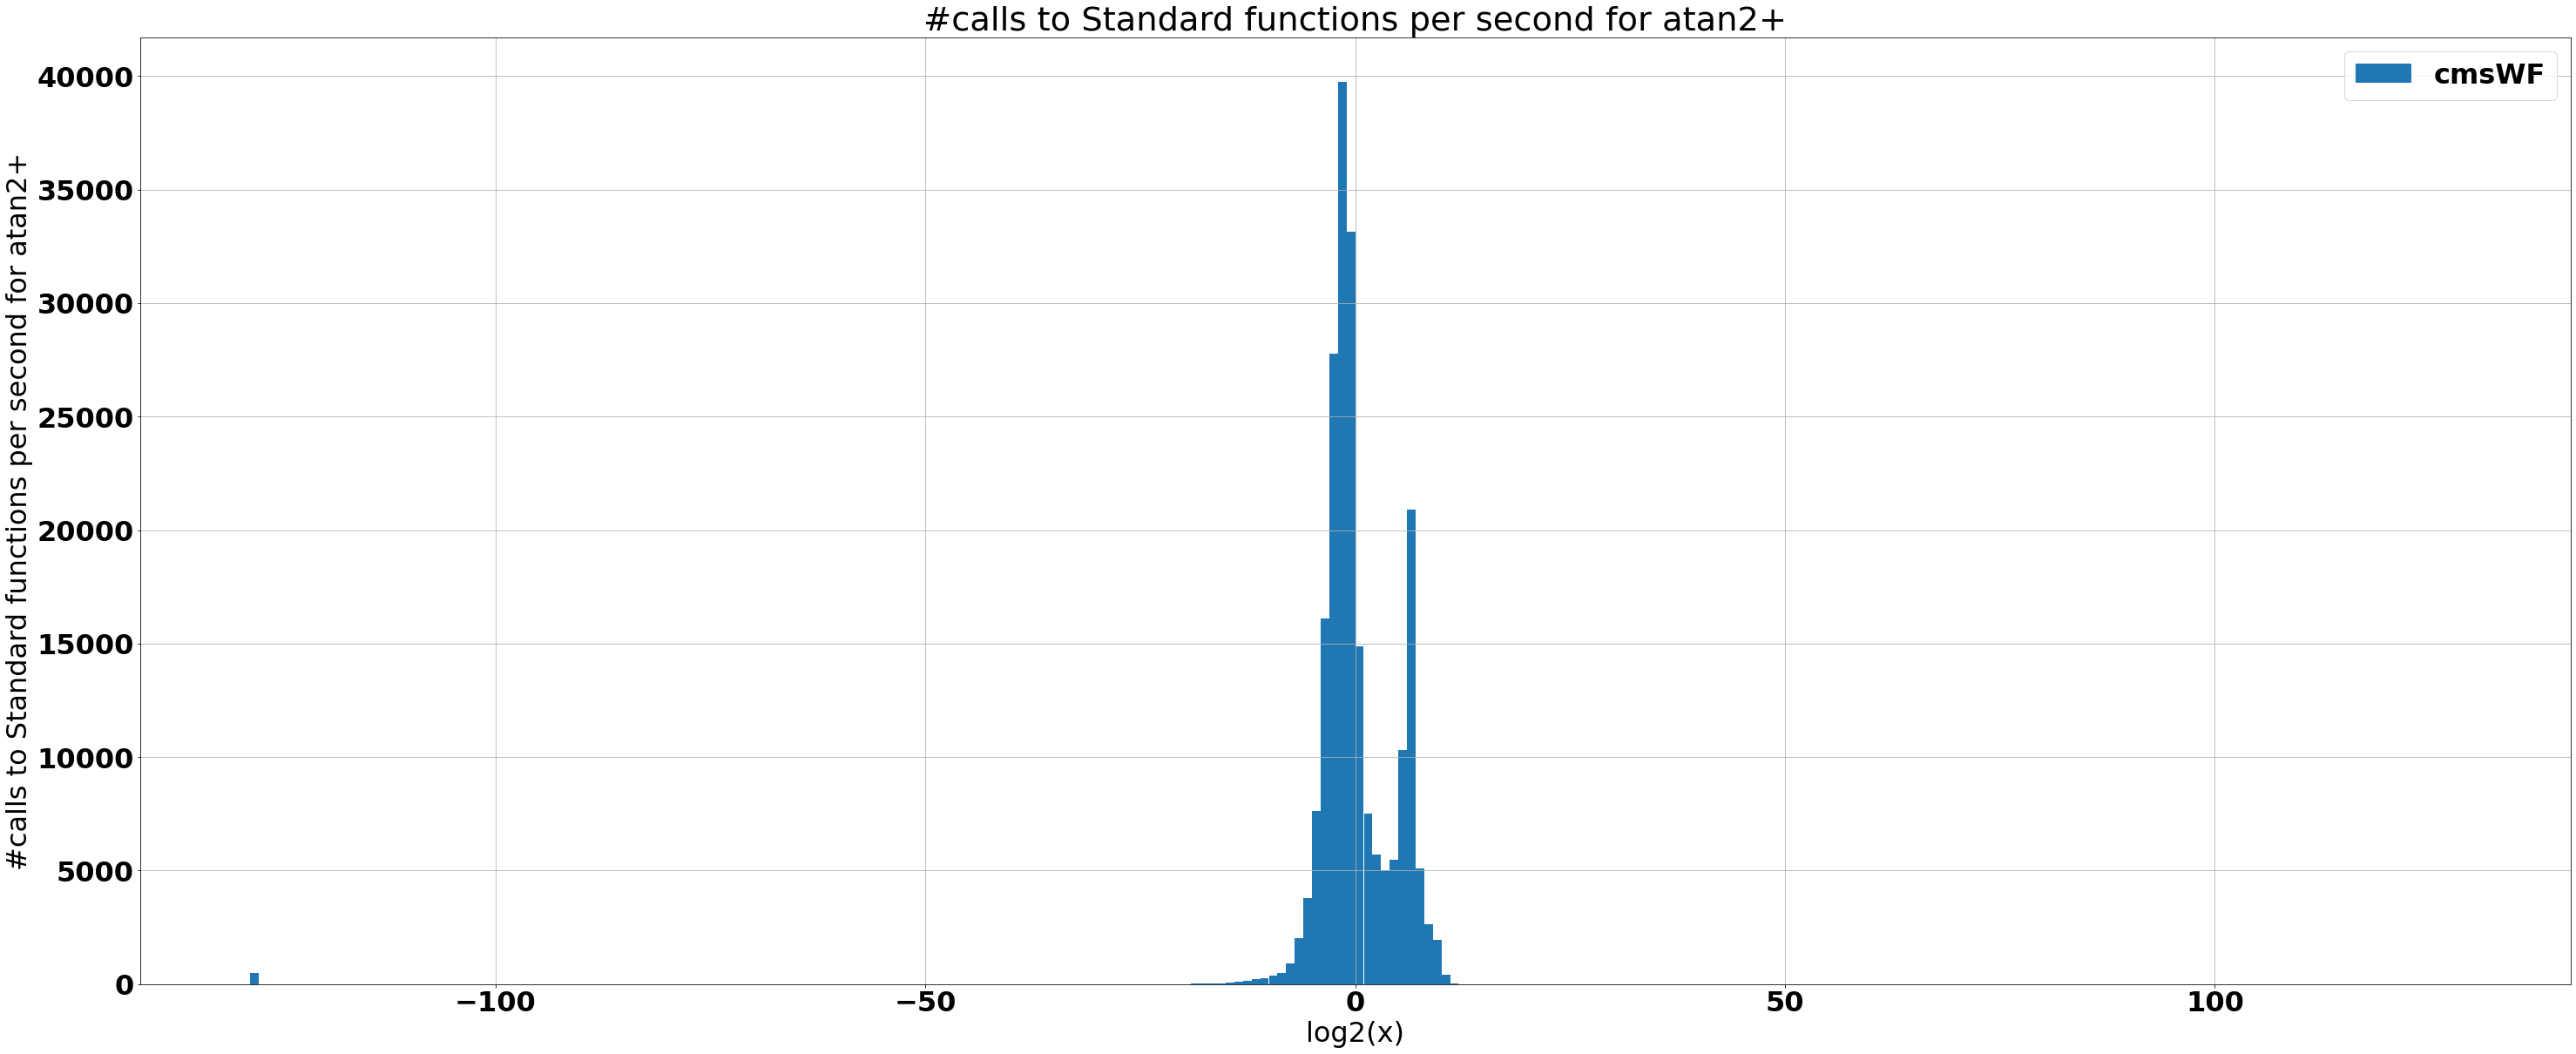

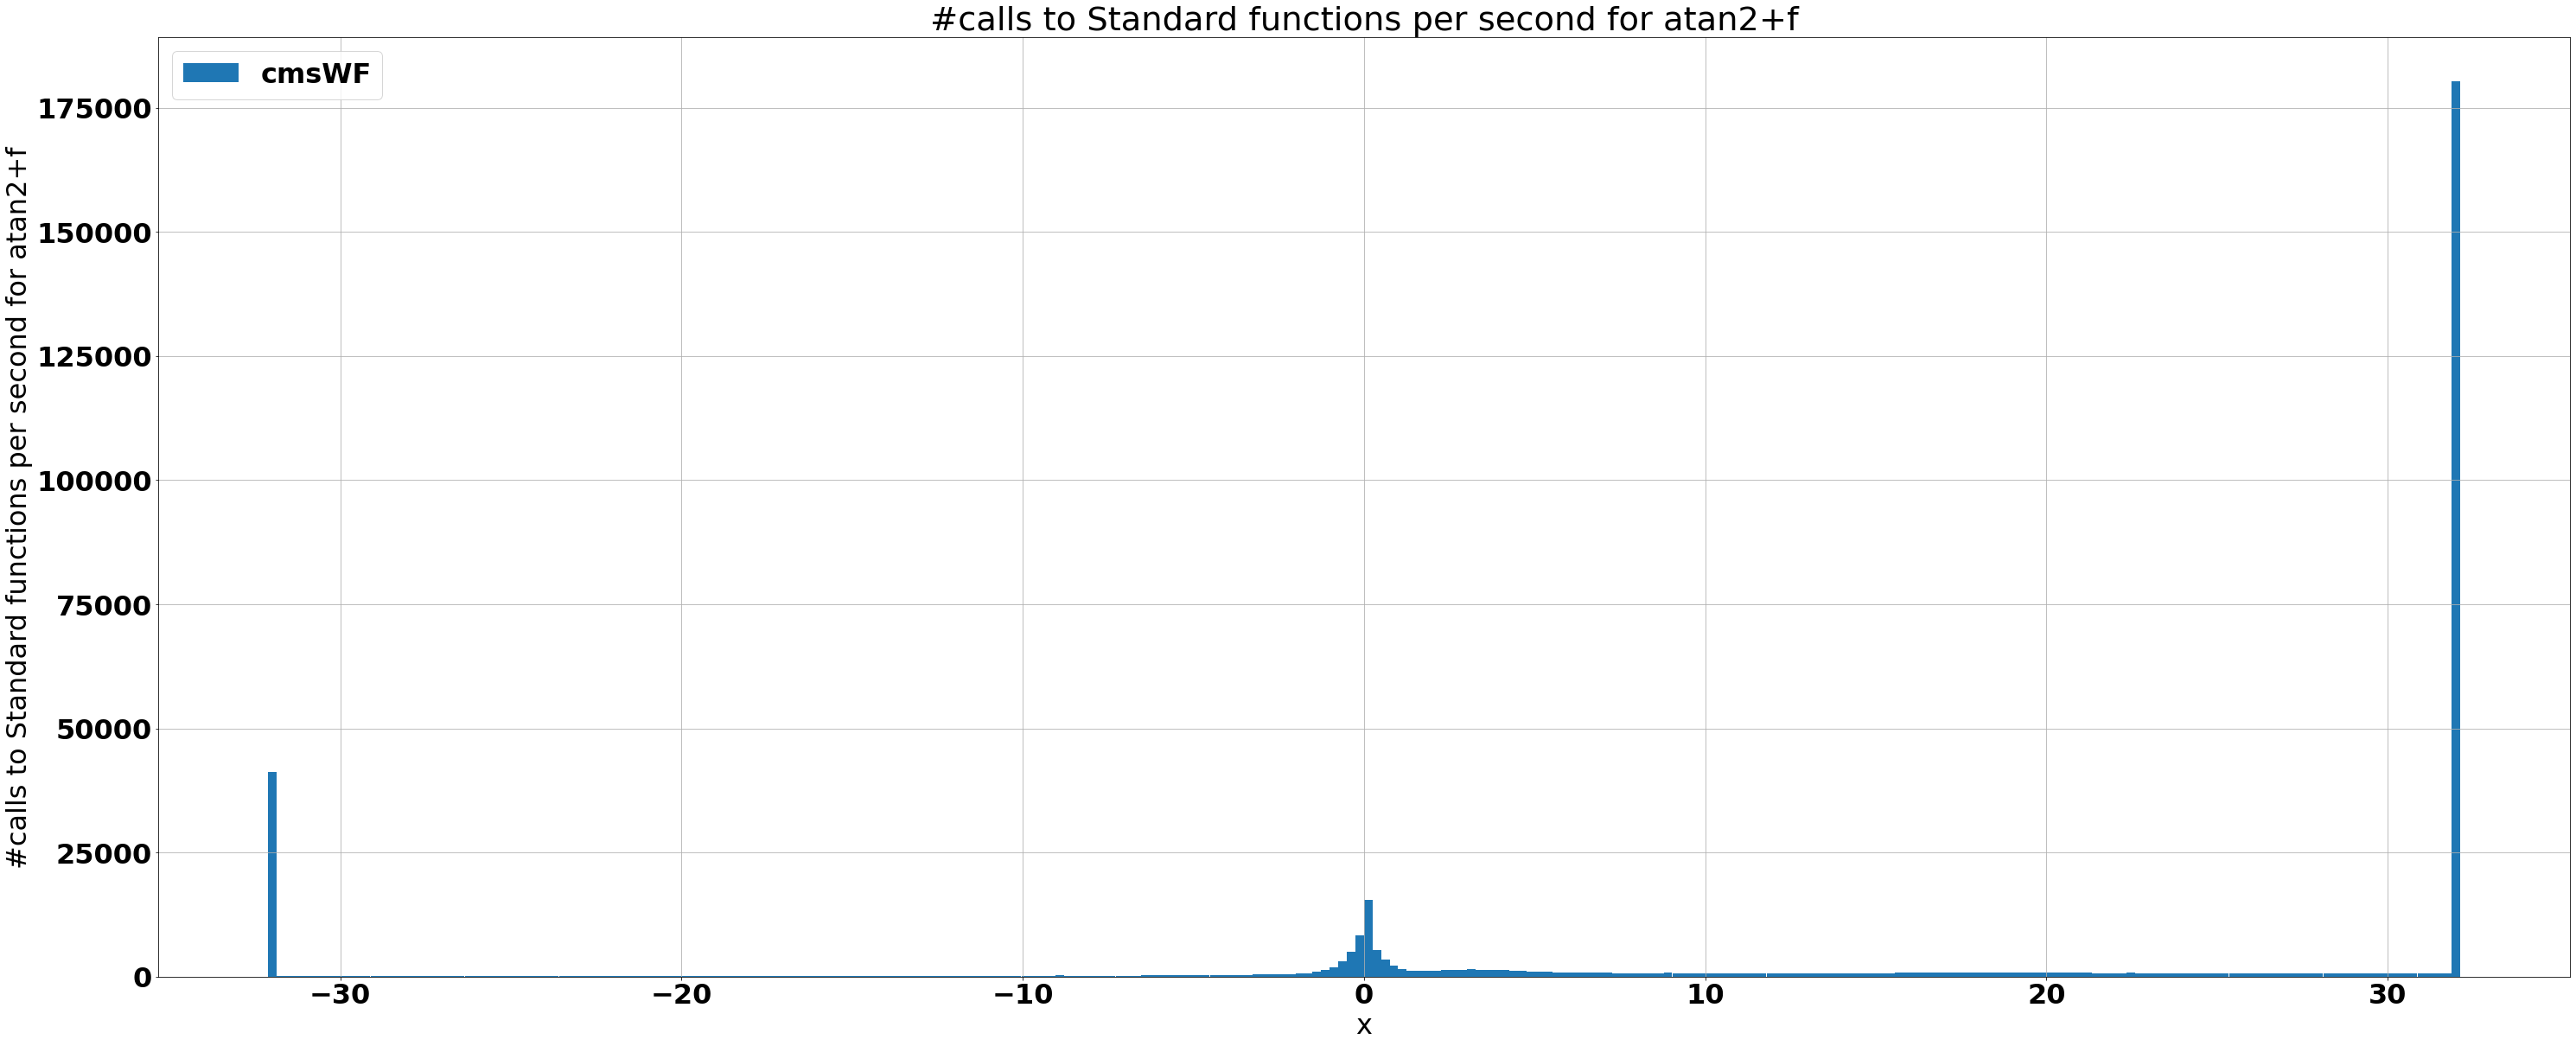

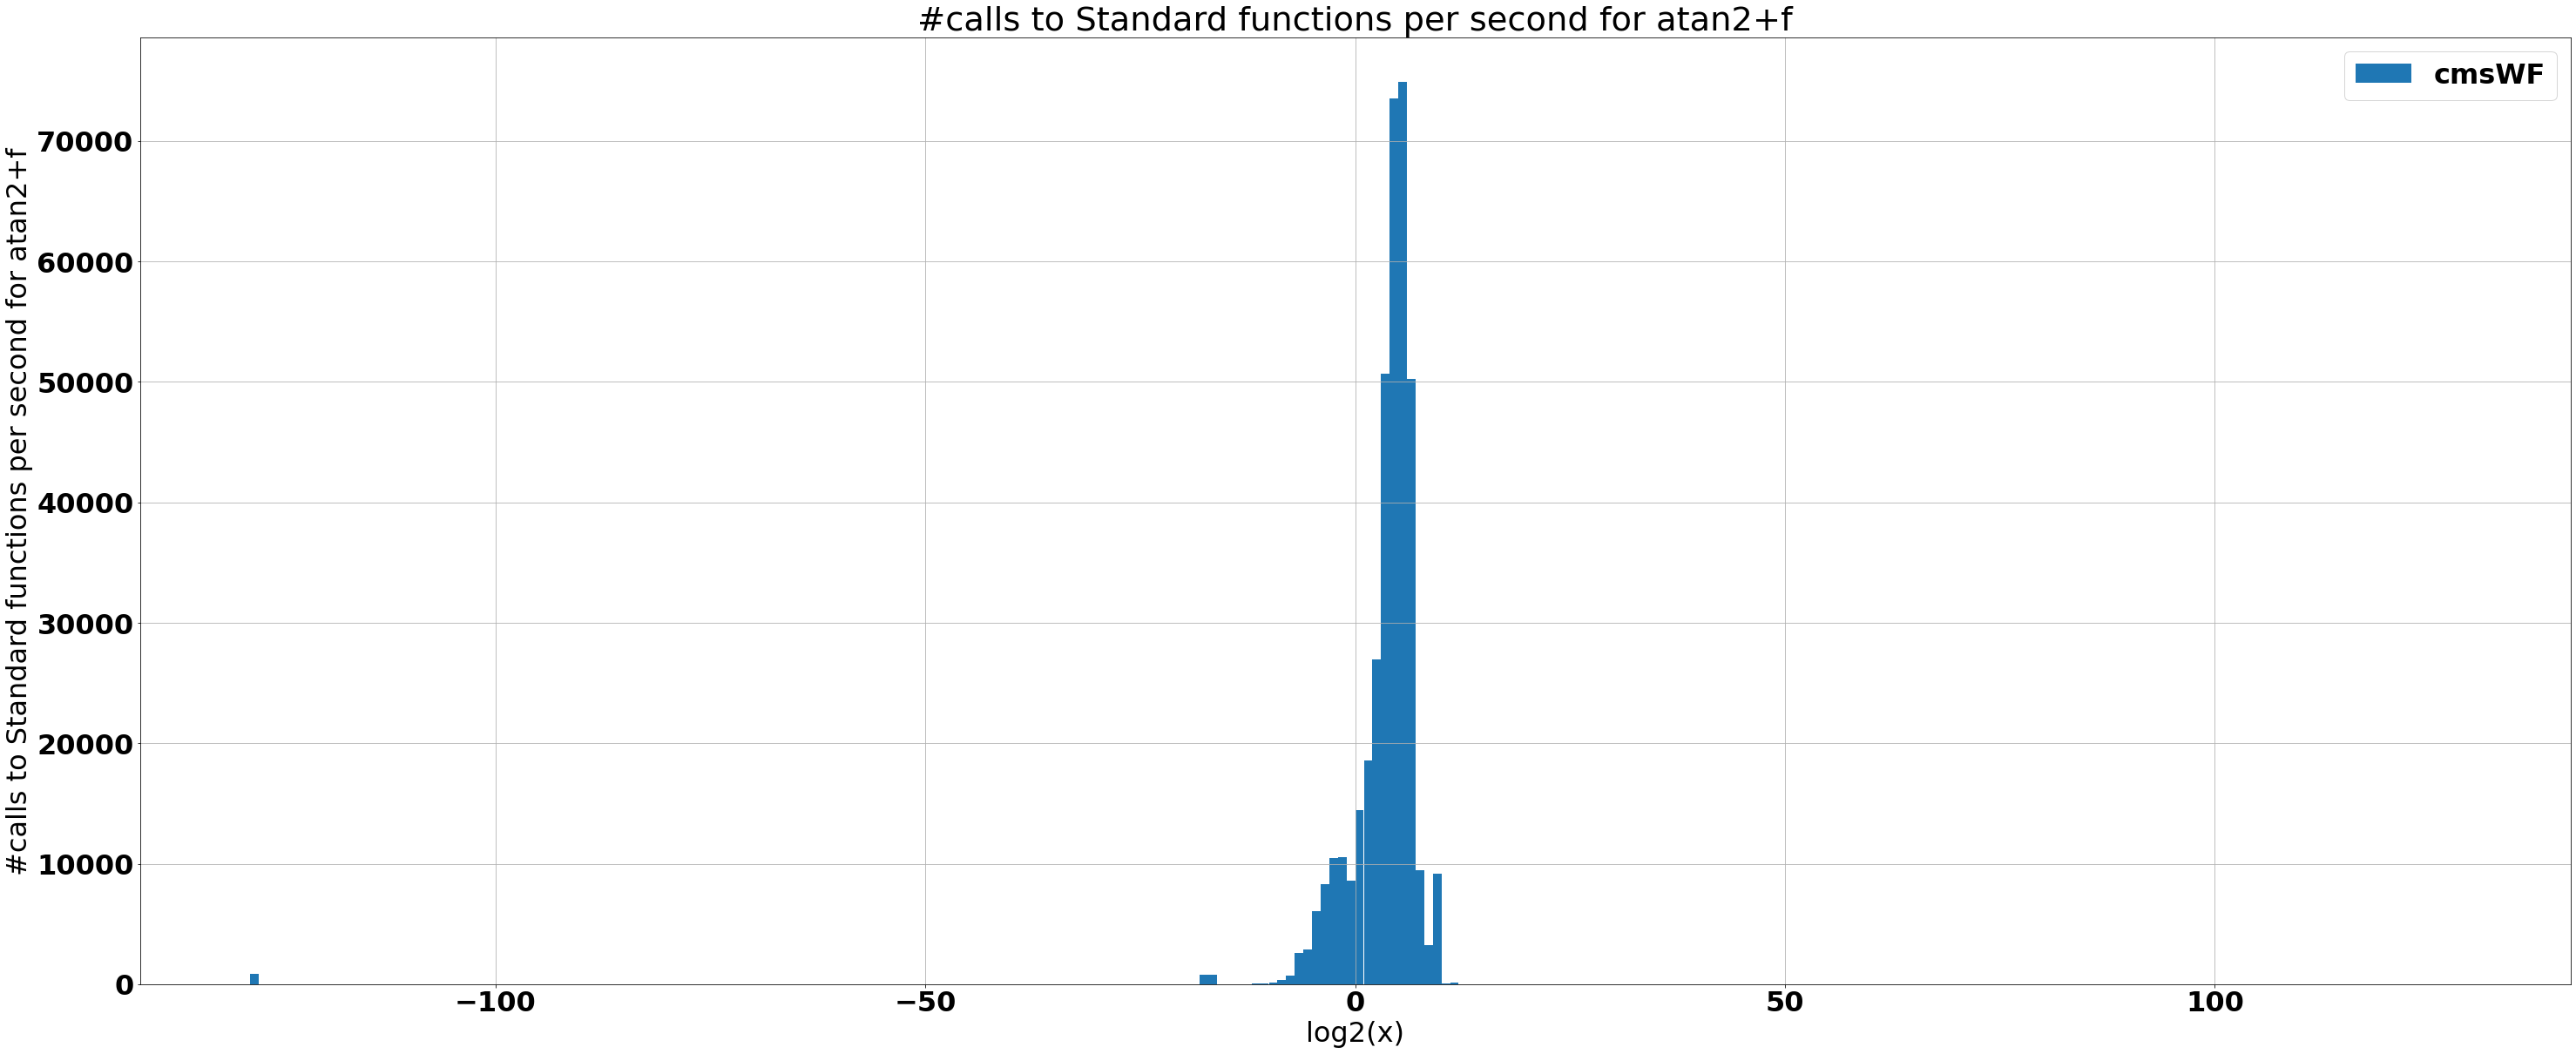

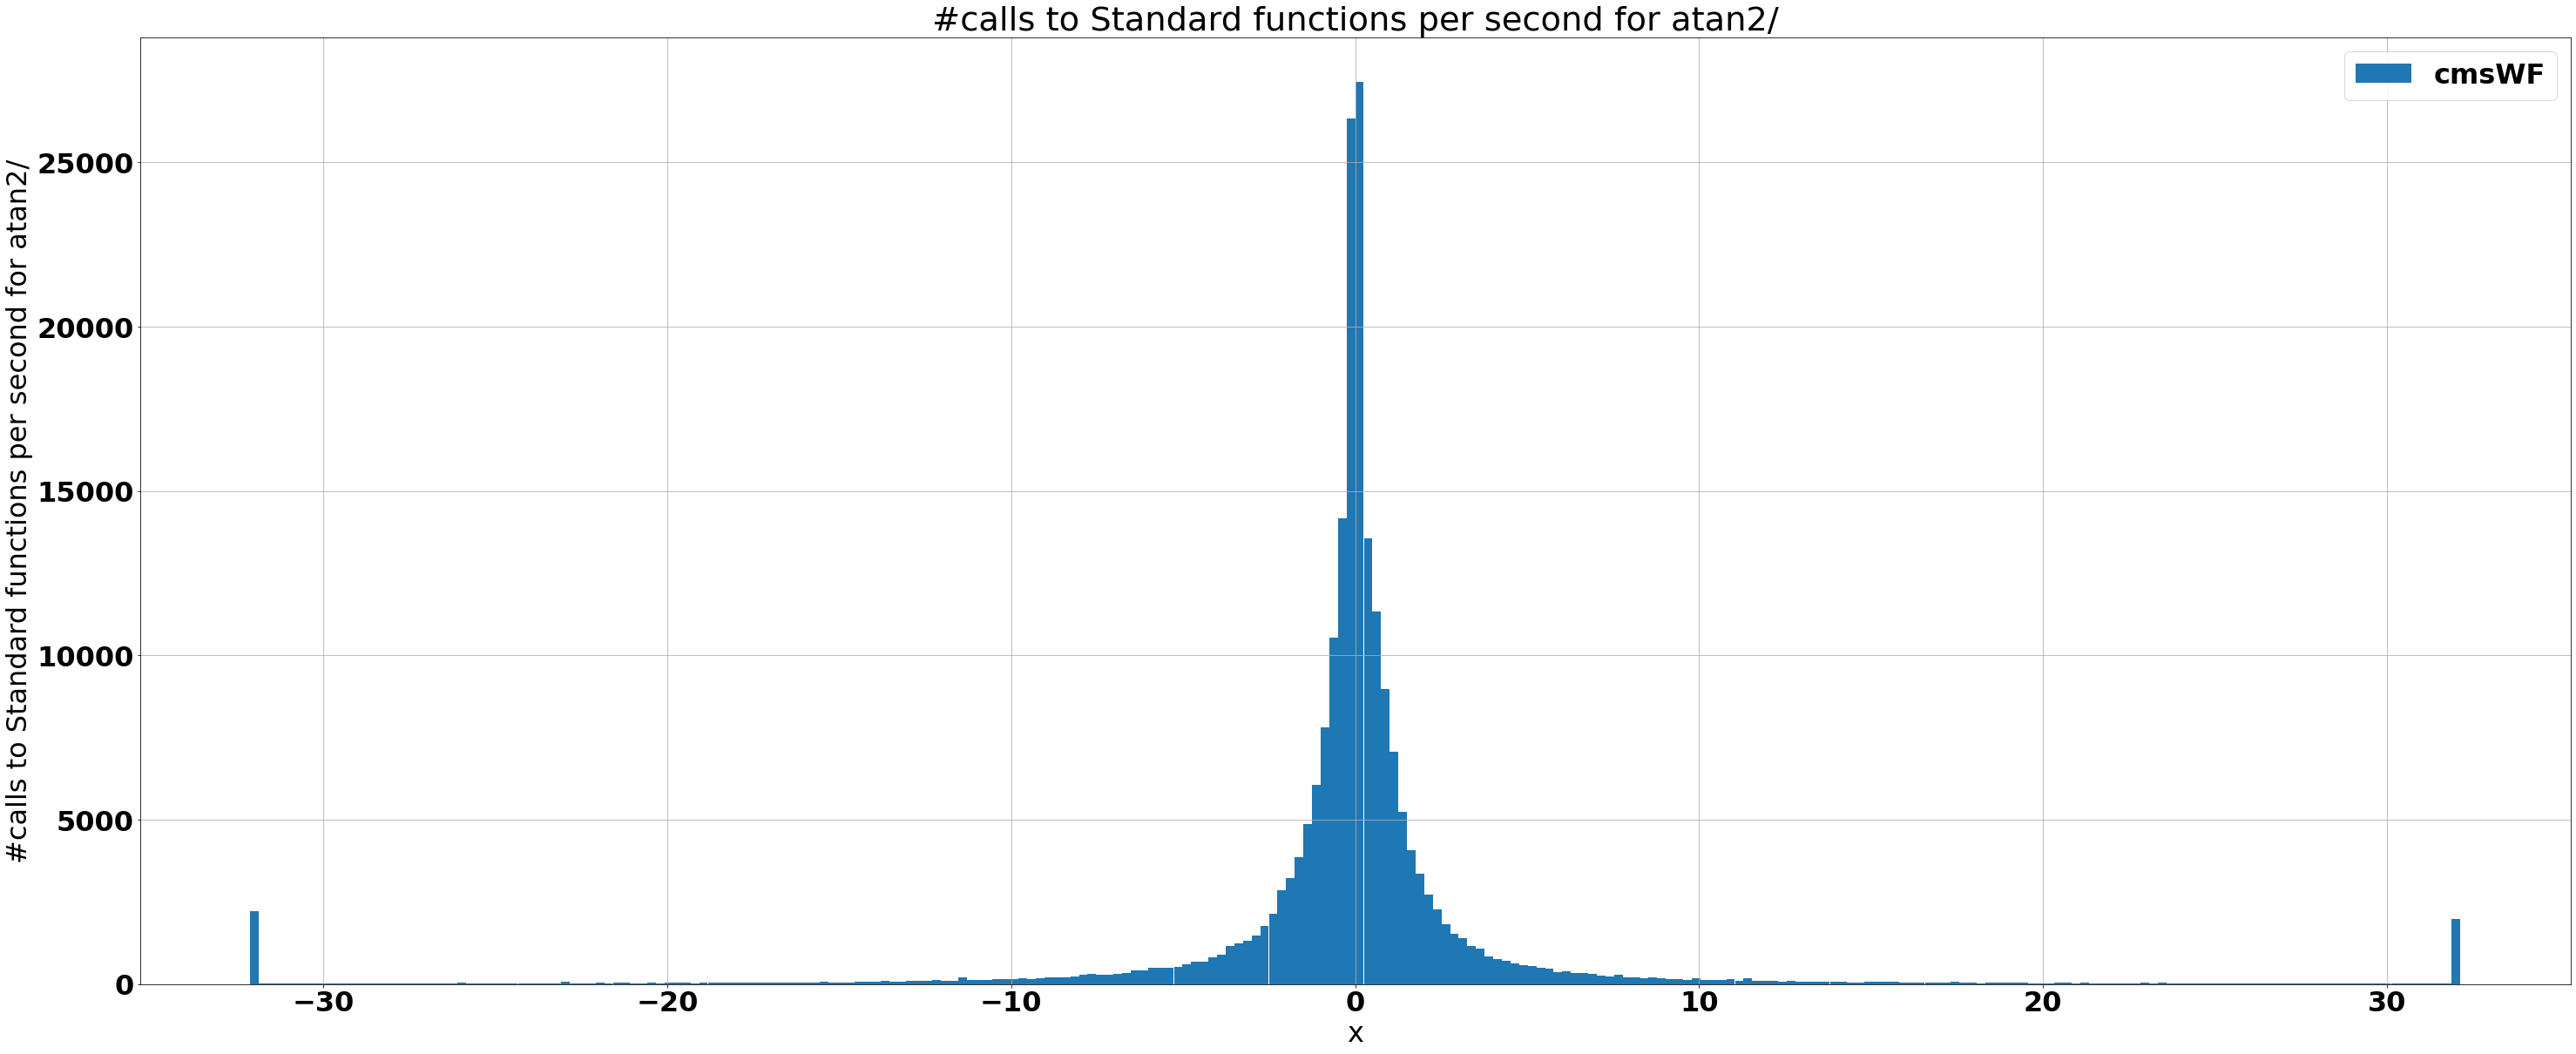

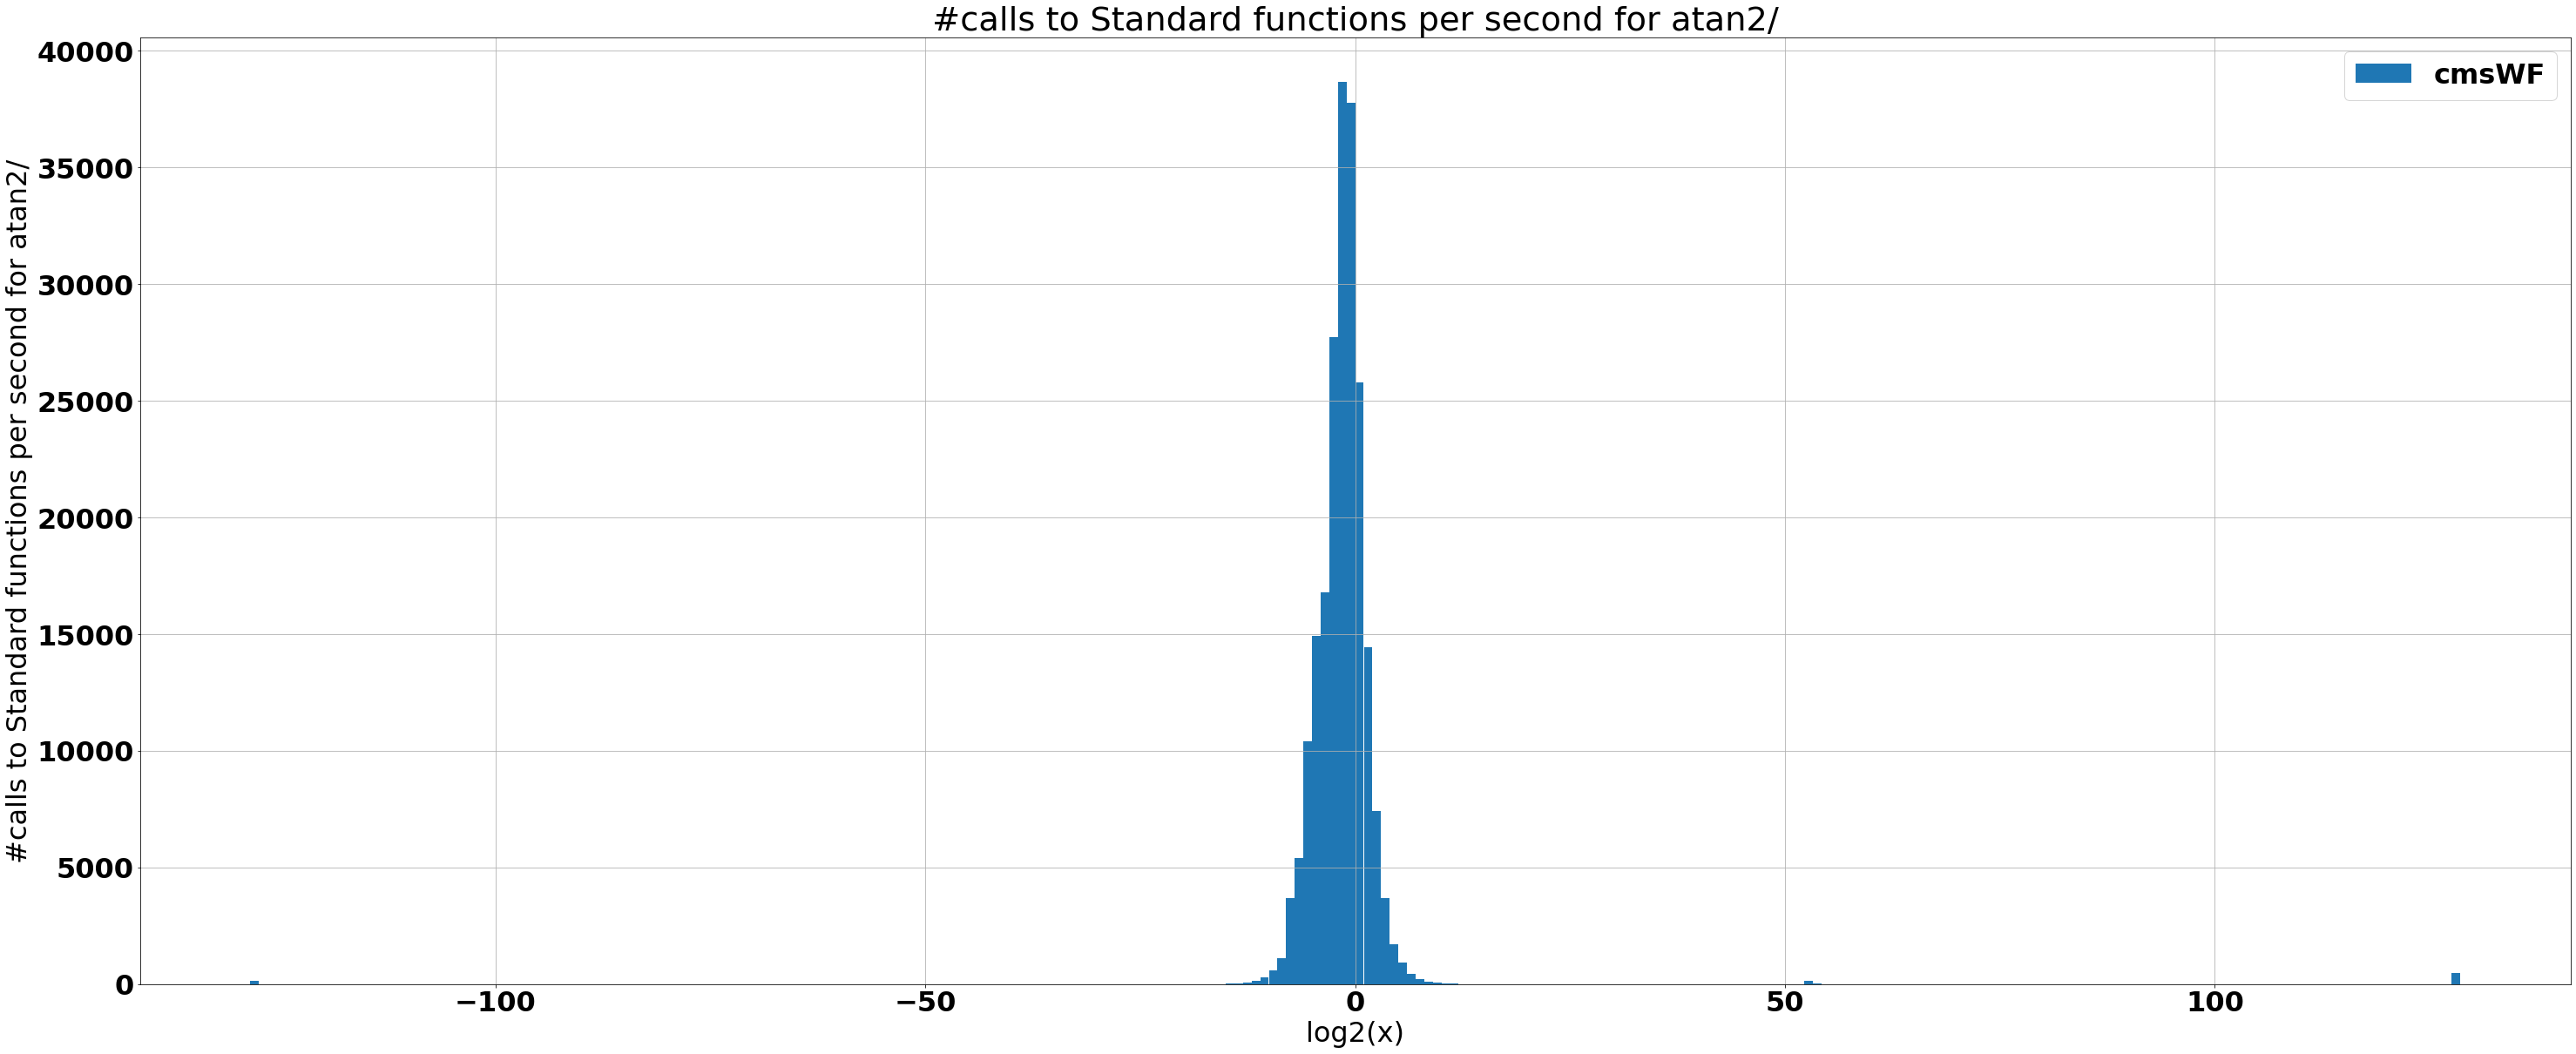

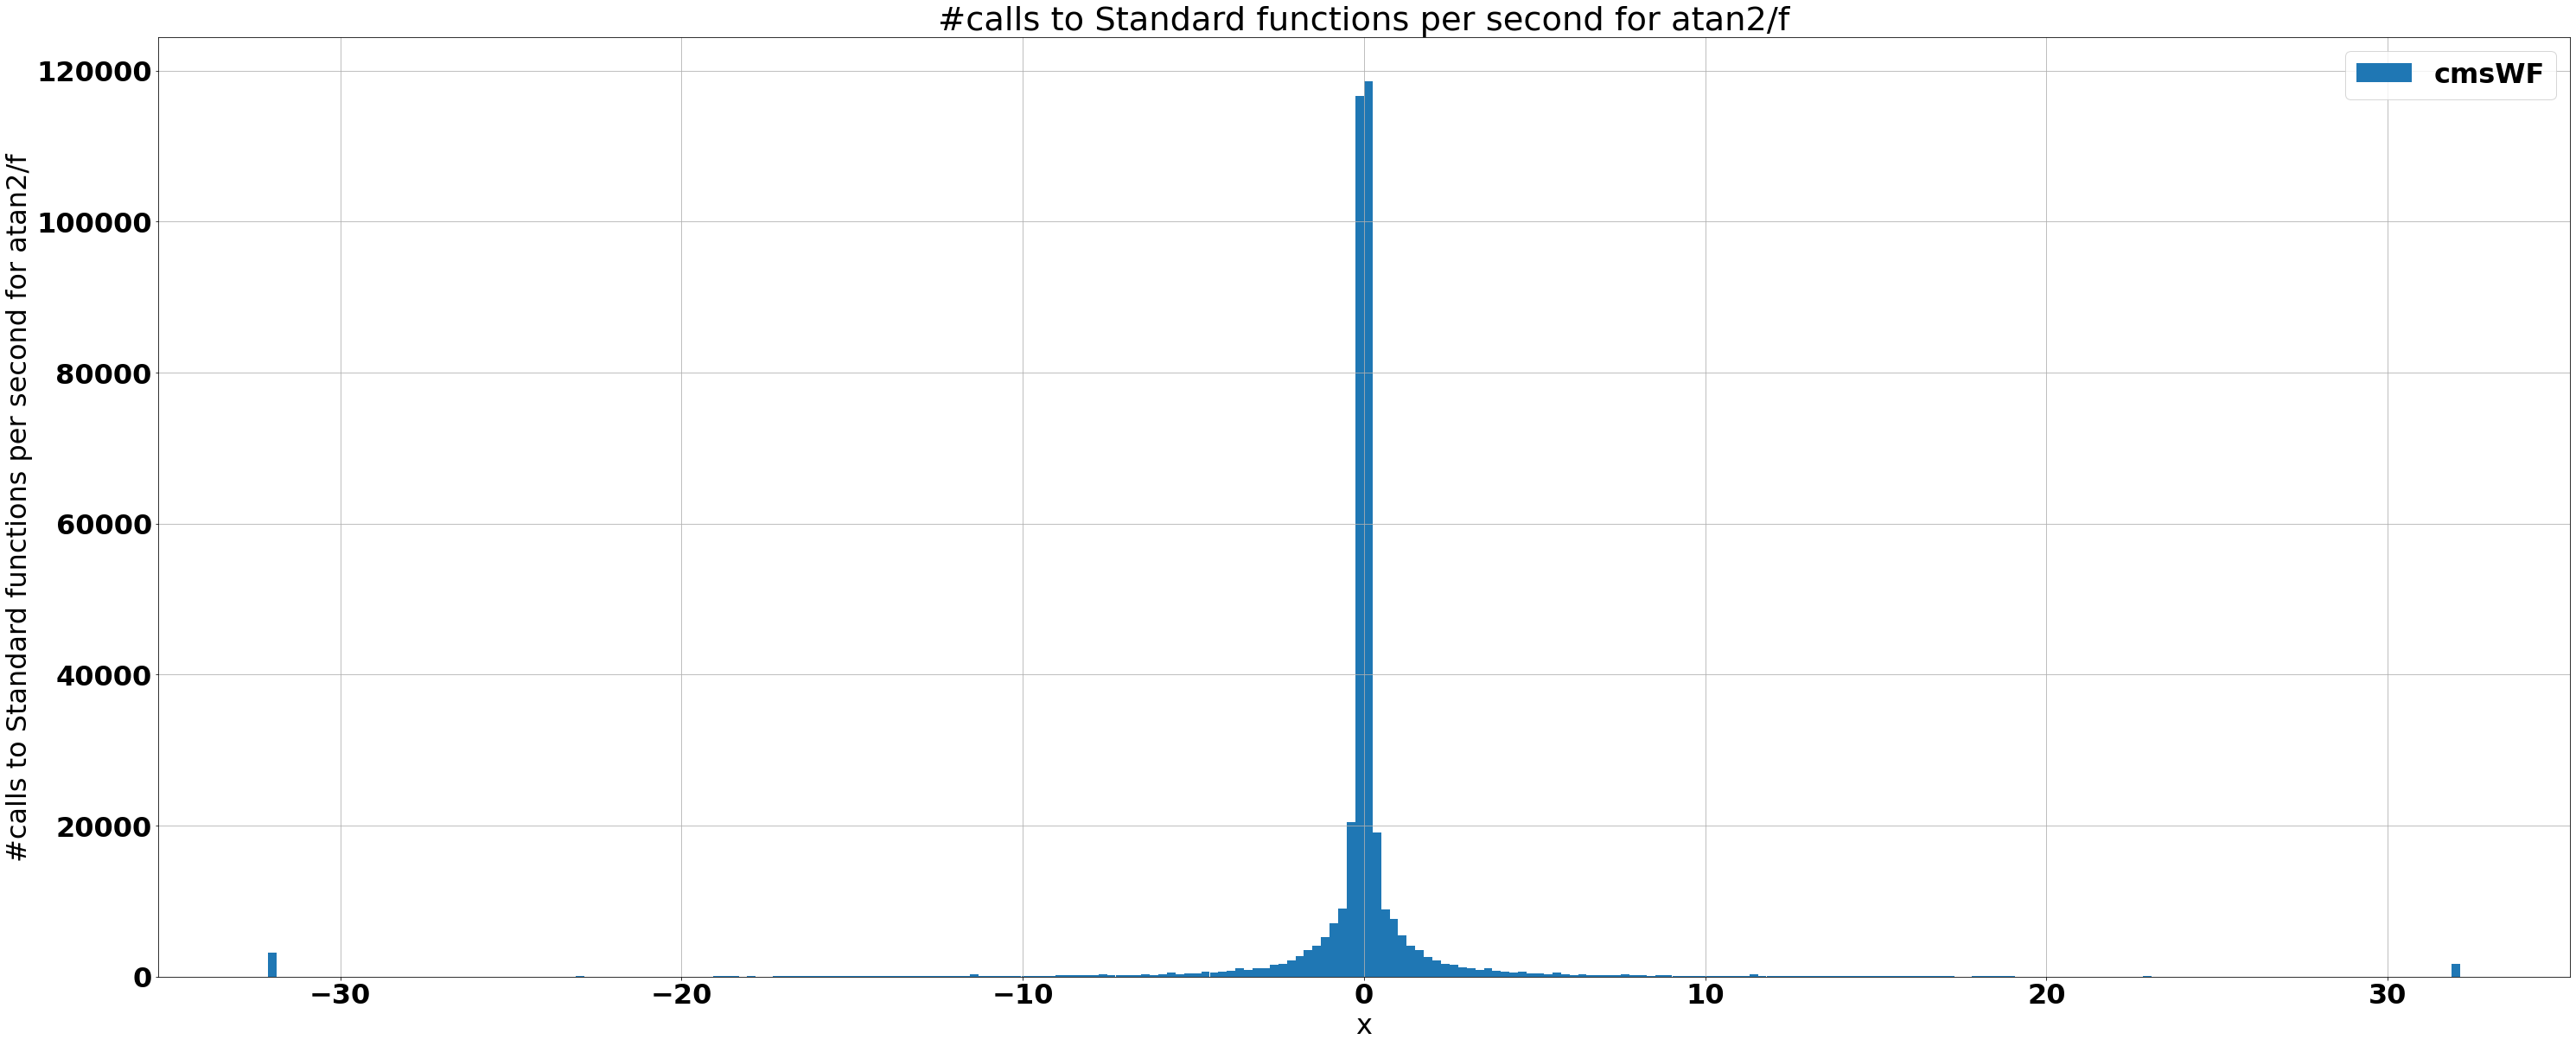

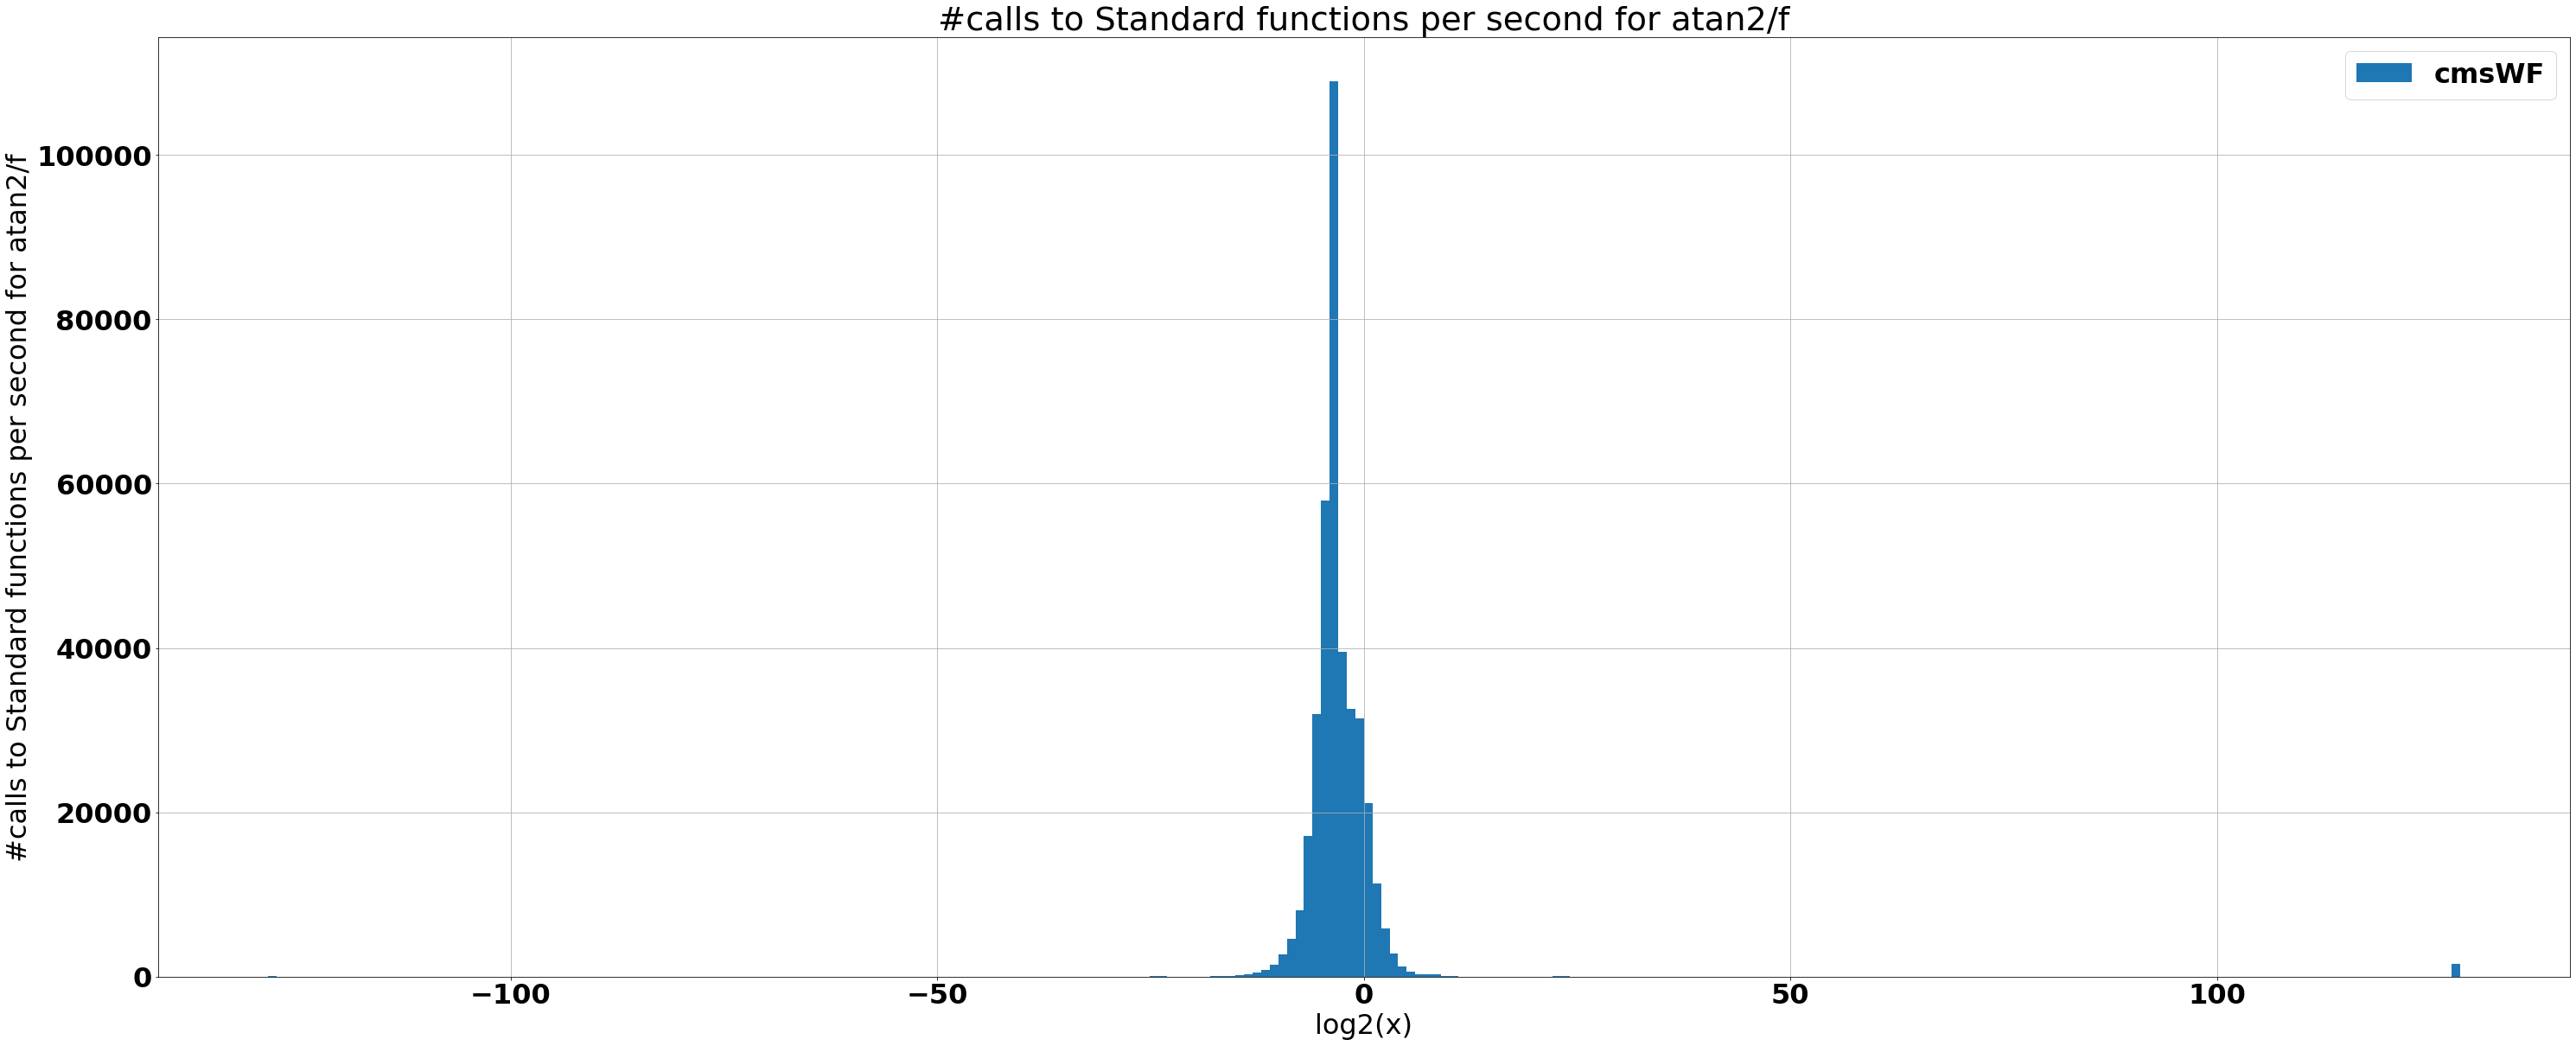

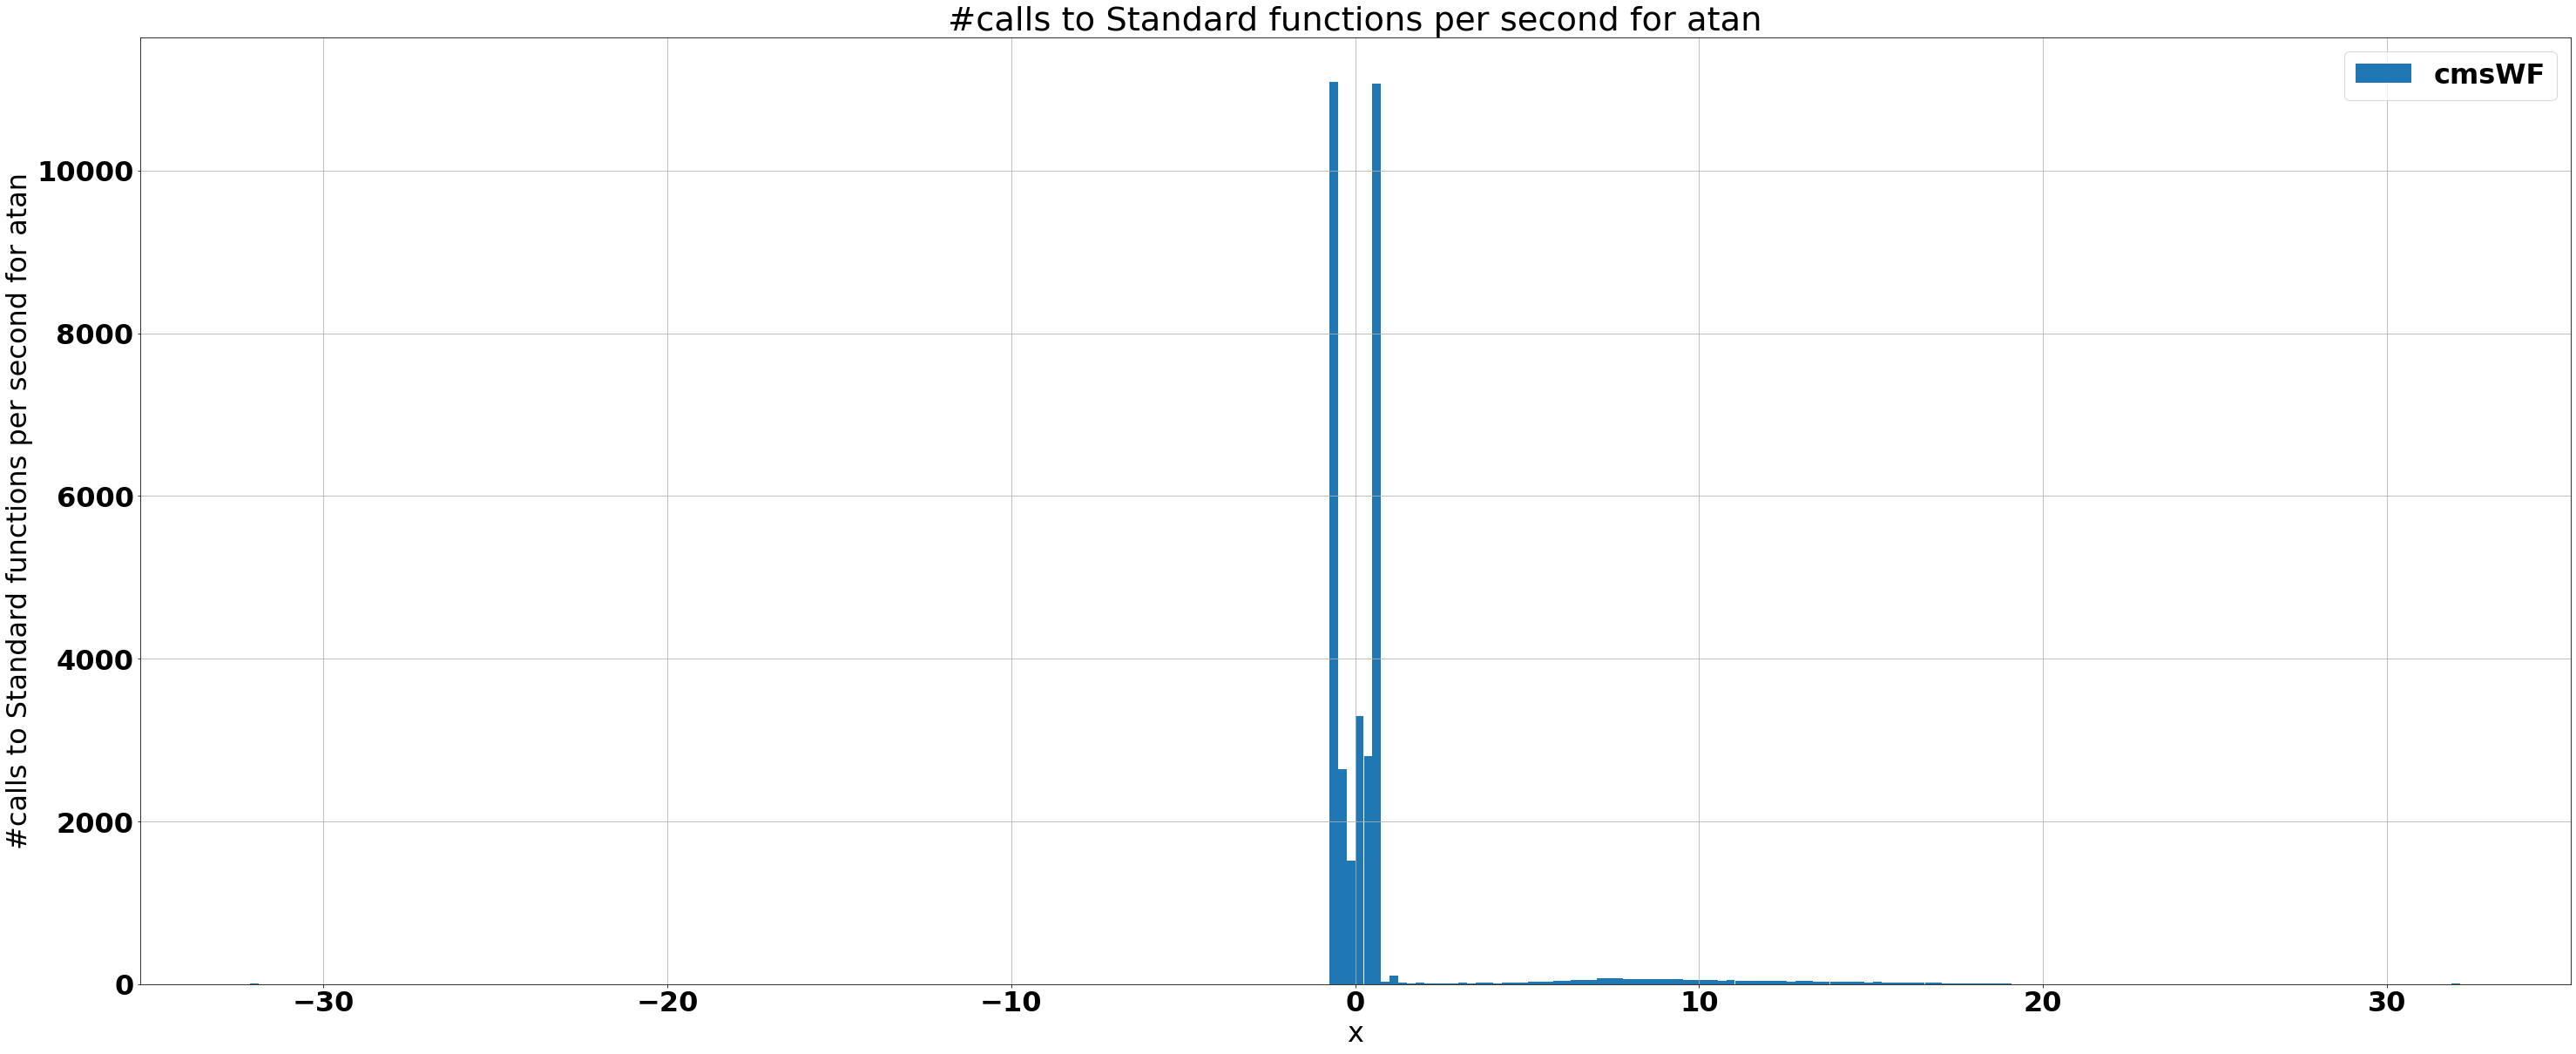

In [ ]:
for fun in labels :
    (l,d) = fun.split("_")
    if (score[fun]['tot']==0) : continue
    plotOne(l,name)
